In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

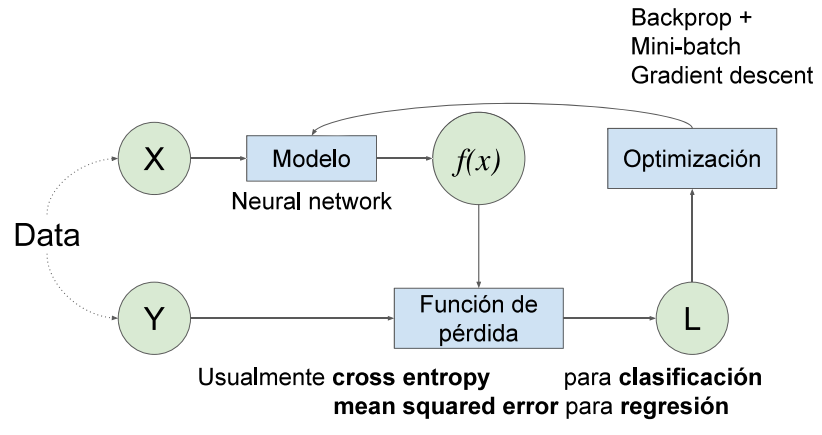

In [2]:
# Parametros generales
n_samples = 10000
grid_size = 1500

In [3]:
# Generamos datasets de prueba
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8, centers=2)
no_structure = np.random.rand(n_samples, 2)

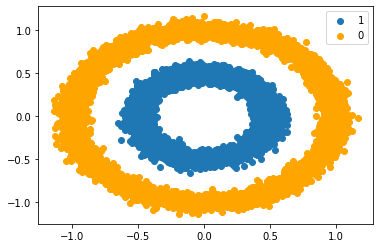

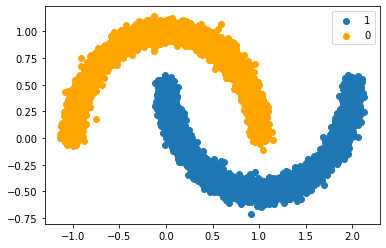

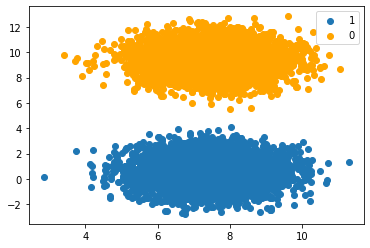

In [4]:
# Visualizacion de los datasets
for dset in [noisy_circles, noisy_moons, blobs]:
  X, y = dset[0], dset[1]
  plt.scatter(X[:,0][y == 1], X[:,1][y == 1], label="1")
  plt.scatter(X[:,0][y == 0], X[:,1][y == 0], label="0", color="orange")
  plt.legend()
  plt.show()

# Perceptron

![perceptron](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Perceptr%C3%B3n_5_unidades.svg/400px-Perceptr%C3%B3n_5_unidades.svg.png)

In [21]:
X, y = noisy_moons

In [22]:
X.shape, y.shape

((10000, 2), (10000,))

In [22]:
h0_size = 1 # perceptron = 1 neurona
w0 = np.random.random(size=(X.shape[1], h0_size)) # pesos

In [23]:
def activation_function(x):
  # sigmoid function
  return 1 / (1 + np.exp(-x))

In [9]:
# Acabamos de crear una red de tipo perceptron! ahora vamos a entrenarla

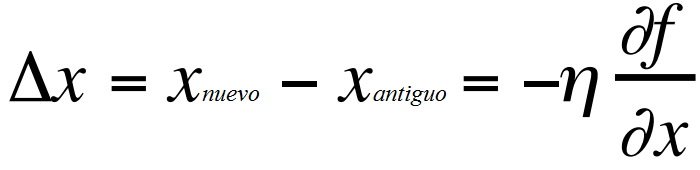

In [10]:
def activation_function_gradient(x):
  return x * (1 - x)

In [11]:
def error(X, w, y, threshold=0.5):
  predictions = activation_function(X @ w)
  # predictions_binary = predictions > threshold
  error = ((y.reshape(y.shape[0], 1) - predictions)**2).sum()
  return error

In [24]:
def train_perceptron(X, y, w, epochs):
  for _ in range(epochs):
    for i, x in enumerate(X):
      z = x.T @ w
      output = activation_function(z)
      
      output_error = y[i] - output
      output_delta = output_error * activation_function_gradient(output)

      # update
      w += (x.reshape(x.shape[0],1) @ output_delta).reshape(w.shape[0], w.shape[1])
    print(f"Epoch {_} --- loss {error(X, w, y)}")
  return w

In [25]:
w1 = train_perceptron(X, y, w0, 100)

Epoch 0 --- loss 829.8902919698097
Epoch 1 --- loss 829.8905951638241
Epoch 2 --- loss 829.8905951742172
Epoch 3 --- loss 829.8905951742175
Epoch 4 --- loss 829.8905951742175
Epoch 5 --- loss 829.8905951742175
Epoch 6 --- loss 829.8905951742175
Epoch 7 --- loss 829.8905951742175
Epoch 8 --- loss 829.8905951742175
Epoch 9 --- loss 829.8905951742175
Epoch 10 --- loss 829.8905951742175
Epoch 11 --- loss 829.8905951742175
Epoch 12 --- loss 829.8905951742175
Epoch 13 --- loss 829.8905951742175
Epoch 14 --- loss 829.8905951742175
Epoch 15 --- loss 829.8905951742175
Epoch 16 --- loss 829.8905951742175
Epoch 17 --- loss 829.8905951742175
Epoch 18 --- loss 829.8905951742175
Epoch 19 --- loss 829.8905951742175
Epoch 20 --- loss 829.8905951742175
Epoch 21 --- loss 829.8905951742175
Epoch 22 --- loss 829.8905951742175
Epoch 23 --- loss 829.8905951742175
Epoch 24 --- loss 829.8905951742175
Epoch 25 --- loss 829.8905951742175
Epoch 26 --- loss 829.8905951742175
Epoch 27 --- loss 829.8905951742175
Ep

In [26]:
error(X, w1, y)

829.8905951742175

In [48]:
x1_range = np.linspace(X[:,0].min(), X[:,0].max(), grid_size)
x2_range = np.linspace(X[:,1].min(), X[:,1].max(), grid_size)

In [49]:
x1_range, x2_range

(array([-1.12573509, -1.12356306, -1.12139103, ...,  2.12579525,
         2.12796728,  2.13013931]),
 array([-0.63086981, -0.62967335, -0.6284769 , ...,  1.16022935,
         1.16142581,  1.16262227]))

In [50]:
x1_, x2_ = np.meshgrid(x1_range, x2_range)

In [52]:
stacked_grid = np.dstack((x1_,x2_))
y_grid = [activation_function(x_grid @ w1) for x_grid in stacked_grid]

In [31]:
y_grid = np.array(y_grid).reshape(grid_size, grid_size)

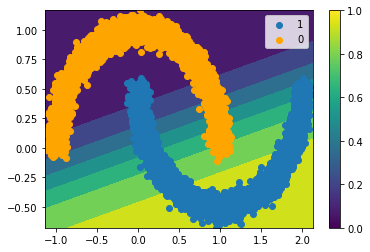

In [32]:
plt.contourf(x1_range, x2_range, y_grid)
plt.scatter(X[:,0][y == 1], X[:,1][y == 1], label="1")
plt.scatter(X[:,0][y == 0], X[:,1][y == 0], label="0", color="orange")
plt.colorbar()
plt.legend()
plt.show()

MultiLayer Perceptron

![mlp](https://www.researchgate.net/profile/Allan-Kardec-Barros-Filho/publication/274240858/figure/fig1/AS:392021136166914@1470476530215/TOPOLOGY-OF-A-MULTILAYER-PERCEPTRON-NEURAL-NETWORK.png)

In [37]:
def nn_forward(X, weights, act_fnc):
  z0 = act_fnc(X @ weights[0]) # C.Entrada -> 1ra C.Oculta
  z_i = z0
  for w in weights[1:]:
    z_i = act_fnc(z_i @ w)
  return z_i

In [38]:
def error_mlp(X, w0, w1, w2, y, threshold=0.5):
  # Forward pass 
  z0 = activation_function(X @ w0) # C.Entrada -> 1ra C.Oculta
  # (n_obs, h0_size)
  z1 = activation_function(z0 @ w1) # 1ra C.Oculta -> 2da. C.Oculta
  # (h0_size, h1_size)
  predictions = activation_function(z1 @ w2) # 2da C.Oculta -> C.Salida
  # (n_obs, output_size)
  # predictions_binary = predictions > threshold
  error = ((y.reshape(y.shape[0], 1) - predictions)**2).sum() # mean squared error
  return error

In [39]:
def train_mlp(X, y, w0, w1, w2, epochs):
  for _ in range(epochs):
    for i, x in enumerate(X):
      # Forward pass 
      z0 = activation_function(x.T @ w0) # C.Entrada -> 1ra C.Oculta
      # (n_obs, h0_size)
      z1 = activation_function(z0 @ w1) # 1ra C.Oculta -> 2da. C.Oculta
      # (h0_size, h1_size)
      output = activation_function(z1 @ w2) # 2da C.Oculta -> C.Salida
      # (n_obs, output_size)
      
      # Backpropagation 
      output_error = y[i] - output # (n_obs, output_size)
      output_delta = output_error * activation_function_gradient(output)

      # output_delta --> (n_obs, output_size)
      # w2 --> (h1_size, output_size).T --> (output_size, h1_size)
      z1_error = output_delta @ w2.T
      z1_delta = z1_error * activation_function_gradient(z1)

      z0_error = z1_delta @ w1.T
      z0_delta = z0_error * activation_function_gradient(z0)

      # Gradient Step (weights update)

      # z1 -> (n_obs, h1_size).T --> (h1_size, n_obs)
      # output_delta -> (n_obs, output_size)
      # w2 -> (h1_size, output_size)
      w2 += z1.reshape((1,-1)).T @ output_delta.reshape((1,-1))
      
      # z0 -> (n_obs, h0_size).T --> (h0_size, n_obs)
      # z1_delta -> (n_obs, h1_size)
      # w1 -> (h0_size, h1_size)
      w1 += z0.reshape((1,-1)).T @ z1_delta.reshape((1,-1))

      # x -> (n_obs, input_size).T --> (input_size, n_obs)
      # z0_delta -> (n_obs, h0_size)
      # w0 -> (input_size, h0_size)
      w0 += x.reshape((1,-1)).T @ z0_delta.reshape((1,-1))
    print(f"Epoch {_} --- loss {error_mlp(X, w0, w1, w2, y)}")

In [35]:
h0_size = 3 
h1_size = 2 
output_size = 1

# pesos
w0 = np.random.random(size=(X.shape[1], h0_size))
w1 = np.random.random(size=(h0_size, h1_size)) 
w2 = np.random.random(size=(h1_size, output_size))

In [43]:
train_mlp(X, y, w0, w1, w2, epochs=100)

Epoch 0 --- loss 778.6137764741281
Epoch 1 --- loss 777.9234353351171
Epoch 2 --- loss 778.6312195131424
Epoch 3 --- loss 779.4456875332525
Epoch 4 --- loss 780.1430277385031
Epoch 5 --- loss 780.7025664736942
Epoch 6 --- loss 781.1444327263657
Epoch 7 --- loss 781.4937931294792
Epoch 8 --- loss 781.7722092073418
Epoch 9 --- loss 781.9963310665728
Epoch 10 --- loss 782.1785984973778
Epoch 11 --- loss 782.3282501157782
Epoch 12 --- loss 782.4521826481954
Epoch 13 --- loss 782.5555944611743
Epoch 14 --- loss 782.6424478857484
Epoch 15 --- loss 782.7157979251751
Epoch 16 --- loss 782.7780265637541
Epoch 17 --- loss 782.8310111349144
Epoch 18 --- loss 782.8762465347894
Epoch 19 --- loss 782.9149348766493
Epoch 20 --- loss 782.9480519432159
Epoch 21 --- loss 782.9763969269552
Epoch 22 --- loss 783.0006300064696
Epoch 23 --- loss 783.0213009815916
Epoch 24 --- loss 783.038871275467
Epoch 25 --- loss 783.0537309740232
Epoch 26 --- loss 783.0662121230737
Epoch 27 --- loss 783.0765991822345
Epo

In [63]:
def plot_decision_rule(X, y, weights, act_fnc, grid_size=1000):
  # Create meshgrid
  x1_range = np.linspace(X[:,0].min(), X[:,0].max(), grid_size) # -> (grid_size, )
  x2_range = np.linspace(X[:,1].min(), X[:,1].max(), grid_size) # -> (grid_size, )
  x1_, x2_ = np.meshgrid(x1_range, x2_range) # x1_ or x_2 -> (grid_size, grid_size)
  stacked_grid = np.dstack((x1_,x2_)) # 3D structure (grid_size, grid_size, 2)
  
  # Calculate nn output
  # x_grid -> (grid_size, 2)
  y_grid = np.array([nn_forward(x_grid, weights, act_fnc) for x_grid in stacked_grid]) # -> (grid_size**2, )
  y_grid = y_grid.reshape(grid_size, grid_size) # -> (grid_size, grid_size)

  # Make plot
  plt.contourf(x1_range, x2_range, y_grid)
  plt.scatter(X[:,0][y == 1], X[:,1][y == 1], label="1")
  plt.scatter(X[:,0][y == 0], X[:,1][y == 0], label="0", color="orange")
  plt.colorbar()
  plt.legend()
  plt.show()

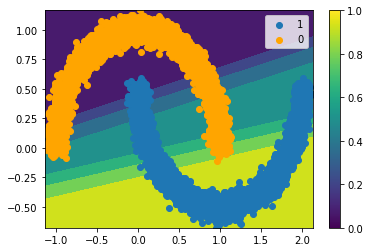

In [45]:
plot_decision_rule(X, y, [w0, w1, w2], activation_function, grid_size)

## Implementar NN como clase de python

In [47]:
class MLP:

  def __init__(self, input_size: int, layers_sizes: list, act_fnc, act_fnc_grad, output_size: int):
    self.input_size = input_size 
    self.layers_sizes = layers_sizes 
    self.act_fnc = act_fnc 
    self.act_fnc_grad = act_fnc_grad
    self.output_size = output_size
    
    # Inicializar los pesos
    self.n_layers = len(self.layers_sizes)
    self.layers_weights = [np.random.random(size=(self.input_size, self.layers_sizes[0]))] + \
    [np.random.random(size=(self.layers_sizes[i], self.layers_sizes[i+1])) for i in range(self.n_layers-1)] + \
    [np.random.random(size=(self.layers_sizes[-1], self.output_size))]

  def forward(self, X, return_outputs=False):
    z = X # input data
    outputs = []
    for w in self.layers_weights:
      z = self.act_fnc(z @ w)
      outputs.append(z)
    
    if return_outputs:
      return outputs
    else:
      return z

  def loss(self, y, y_hat):
    # squared error
    return (y.flatten() - y_hat.flatten())**2

  def train(self, X, y, epochs, batch_size=32, lr=1e-4):
    # Backpropagation algorithm + Gradient Descent
    for epoch in range(epochs):
      for ix in range(batch_size, X.shape[0], batch_size):
        x = X[ix:ix+batch_size] # (batch_size, n_features)
        target = y[ix:ix+batch_size].reshape(-1, self.output_size) # (batch_size, output_size)

        # Paso 1: Forward pass 
        outputs = self.forward(x, return_outputs=True)

        # Paso 2: Backward error propagation
        for j in range(1, len(self.layers_weights)+1):
          # Hint: Se usa -j para ir de "adelante hacia atras"
          
          # Paso 2.1: Calculo del error
          if j == 1:
            z_error = target - outputs[-j] # Capa de salida
          else:
            z_error = z_delta @ self.layers_weights[-(j-1)].T

          # Paso 2.2: Calculo de la gradiente del error
          z_delta = z_error * self.act_fnc_grad(outputs[-j])
          
          # Paso 2.3: Ajuste de pesos proporcionalemente al error
          if j == len(self.layers_weights):
            self.layers_weights[-j] += x.T @ z_delta # Capa de entrada
          else:
            self.layers_weights[-j] += (outputs[-(j+1)].T @ z_delta) * lr
      
      epoch_loss = self.loss(y, self.forward(X)).mean() # Mean Squared Error (mse)
      if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs} --- loss {epoch_loss}")
    
  def plot_decision_rule(self, X, y, grid_size=1000):
    # Create meshgrid
    x1_range = np.linspace(X[:,0].min(), X[:,0].max(), grid_size) # -> (grid_size, )
    x2_range = np.linspace(X[:,1].min(), X[:,1].max(), grid_size) # -> (grid_size, )
    x1_, x2_ = np.meshgrid(x1_range, x2_range) # x1_ or x_2 -> (grid_size, grid_size)
    stacked_grid = np.dstack((x1_,x2_)) # 3D structure (grid_size, grid_size, 2)
  
    # Calculate nn output
    # x_grid -> (grid_size, 2)
    y_grid = np.array([self.forward(x_grid) for x_grid in stacked_grid]) # -> (grid_size**2, )
    y_grid = y_grid.reshape(grid_size, grid_size) # -> (grid_size, grid_size)

    # Make plot
    plt.contourf(x1_range, x2_range, y_grid)
    plt.scatter(X[:,0][y == 1], X[:,1][y == 1], label="1")
    plt.scatter(X[:,0][y == 0], X[:,1][y == 0], label="0", color="orange")
    plt.colorbar()
    plt.legend(loc='upper right')
    plt.show()


In [100]:
X, y = noisy_moons

In [49]:
nn = MLP(
    input_size=X.shape[1], 
    layers_sizes=[6, 3], 
    act_fnc=activation_function, 
    act_fnc_grad=activation_function_gradient,
    output_size=1 # Binary classification
  )

In [97]:
X.shape, y.shape

((10000, 2), (10000,))

In [98]:
prediction = nn.forward(X)
prediction.shape

(10000, 1)

In [52]:
error = nn.loss(y, prediction)
error.mean() # Error con los pesos aleatorios (antes del entrenamiento)

0.3045404671154124

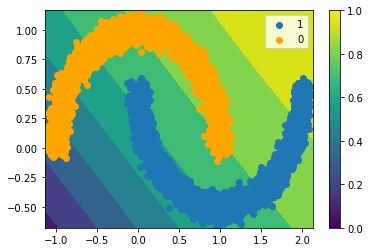

In [53]:
nn.plot_decision_rule(X, y)

In [55]:
nn.train(X, y, epochs=400, batch_size=32, lr=0.1)

Epoch 100/400 --- loss 0.0082182275993037
Epoch 200/400 --- loss 0.0013832975464097674
Epoch 300/400 --- loss 0.0005484282111826278
Epoch 400/400 --- loss 0.0005287078708478444


In [56]:
prediction_trained = nn.forward(X)

In [57]:
error_train = nn.loss(y, prediction_trained)
error_train.mean()

0.0005287078708478444

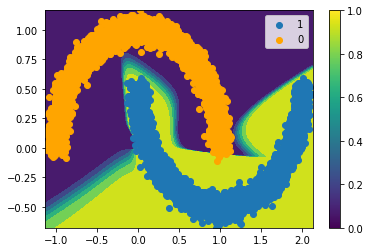

In [58]:
nn.plot_decision_rule(X, y)

In [23]:
# Generamos datasets de prueba
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8, centers=2)
no_structure = np.random.rand(n_samples, 2)

Error ANTES de Entrenar: 0.33345332369225805
Datos y Salida de la Red ANTES de Entrenar


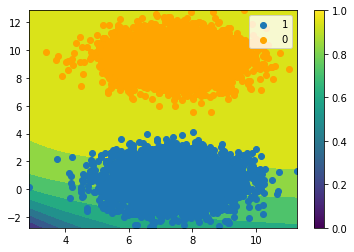

Comienza el entrenamiento:
Epoch 100/400 --- loss 0.00010254377942246262
Epoch 200/400 --- loss 7.181193263222758e-05
Epoch 300/400 --- loss 6.744521769239516e-05
Epoch 400/400 --- loss 2.0274269046401596e-06

Error DESPUES de Entrenar: 2.0274269046401596e-06
Datos y Salida de la Red DESPUES de Entrenar


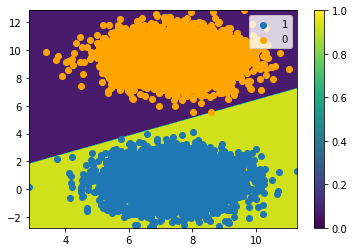

Error ANTES de Entrenar: 0.3796908687141429
Datos y Salida de la Red ANTES de Entrenar


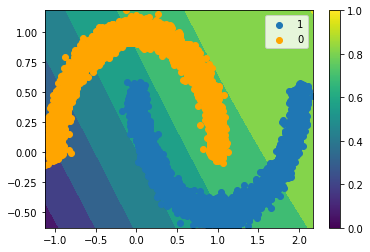

Comienza el entrenamiento:
Epoch 100/400 --- loss 0.00017574578640283407
Epoch 200/400 --- loss 7.800767893634053e-05
Epoch 300/400 --- loss 4.970511399575855e-05
Epoch 400/400 --- loss 3.6347119559272716e-05

Error DESPUES de Entrenar: 3.6347119559272716e-05
Datos y Salida de la Red DESPUES de Entrenar


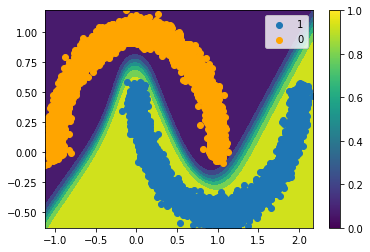

Error ANTES de Entrenar: 0.2811462643828551
Datos y Salida de la Red ANTES de Entrenar


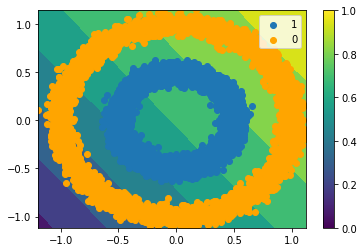

Comienza el entrenamiento:
Epoch 100/400 --- loss 0.13472017304984577
Epoch 200/400 --- loss 0.17204104144208804
Epoch 300/400 --- loss 0.04129287979870784
Epoch 400/400 --- loss 0.042584360107067655

Error DESPUES de Entrenar: 0.042584360107067655
Datos y Salida de la Red DESPUES de Entrenar


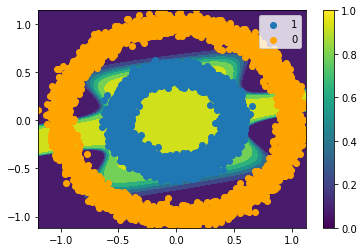

In [60]:
for dset in [blobs, noisy_moons, noisy_circles]:
  X, y = dset[0], dset[1]

  nn = MLP(input_size=X.shape[1], layers_sizes=[6, 3],
           act_fnc=activation_function, act_fnc_grad=activation_function_gradient,
           output_size=1)
  
  print('Error ANTES de Entrenar:', nn.loss(y, nn.forward(X)).mean())
  print('Datos y Salida de la Red ANTES de Entrenar')
  nn.plot_decision_rule(X, y)

  print('Comienza el entrenamiento:')
  nn.train(X, y, epochs=400, batch_size=32, lr=0.1)
  print()

  print('Error DESPUES de Entrenar:', nn.loss(y, nn.forward(X)).mean())
  print('Datos y Salida de la Red DESPUES de Entrenar')
  nn.plot_decision_rule(X, y)

In [32]:
import tensorflow as tf

In [33]:
from sklearn.model_selection import train_test_split
X, y = noisy_moons
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 2), (3000, 2), (7000,), (3000,))

In [39]:
#CONSTRUIR LA RED NEURONAL
NN=tf.keras.models.Sequential() #trayendo el modelo

In [40]:
#agregar la primera capa
NN.add(tf.keras.layers.Dense(units=10000, activation='relu'))
#agregar las capas ocultas
NN.add(tf.keras.layers.Dense(units=100, activation='relu'))
#agregar la capa de salida
NN.add(tf.keras.layers.Dense(units=1, activation='relu'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10000)             30000     
                                                                 
 dense_3 (Dense)             (None, 150)               1500150   
                                                                 
 dense_4 (Dense)             (None, 1)                 151       
                                                                 
Total params: 1,530,301
Trainable params: 1,530,301
Non-trainable params: 0
_________________________________________________________________


In [42]:
#compilar la red neuronal
NN.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
#history = model.fit(X, y,  epochs=50, validation_split=0.2)
history=NN.fit(X_train, y_train, batch_size=30, epochs=10, validation_split=0.2)

Epoch 1/10
187/187 [==============================] - 4s 19ms/step - loss: 0.2489 - accuracy: 0.9264 - val_loss: 0.0264 - val_accuracy: 0.9943
Epoch 2/10
187/187 [==============================] - 3s 17ms/step - loss: 0.0065 - accuracy: 0.9995 - val_loss: 9.4733e-04 - val_accuracy: 1.0000
Epoch 3/10
187/187 [==============================] - 3s 18ms/step - loss: 3.5702e-04 - accuracy: 1.0000 - val_loss: 2.3603e-04 - val_accuracy: 1.0000
Epoch 4/10
187/187 [==============================] - 4s 24ms/step - loss: 1.4028e-04 - accuracy: 1.0000 - val_loss: 2.4491e-04 - val_accuracy: 1.0000
Epoch 5/10
187/187 [==============================] - 3s 17ms/step - loss: 3.9283e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/10
187/187 [==============================] - 3s 17ms/step - loss: 2.8790e-04 - accuracy: 1.0000 - val_loss: 6.6150e-05 - val_accuracy: 1.0000
Epoch 7/10
187/187 [==============================] - 3s 17ms/step - loss: 5.7555e-05 - accuracy: 1.0000 - val

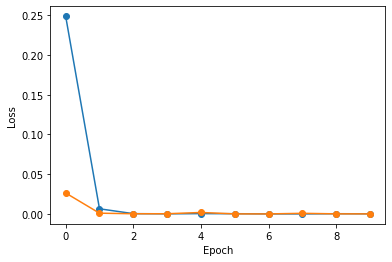

In [44]:
# Visualize training loss
plt.plot(history.history['loss'], marker='o', label='train')
plt.plot(history.history['val_loss'], marker='o', label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [45]:
from tqdm import tqdm

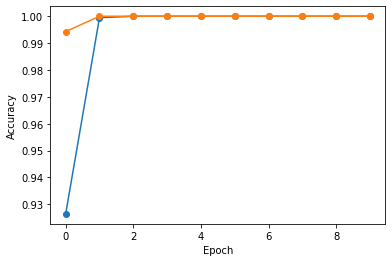

In [46]:
# Visualize training accuracy
plt.plot(history.history['accuracy'], marker='o', label='train')
plt.plot(history.history['val_accuracy'], marker='o', label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [54]:
from tqdm import tqdm
y_grid_complex = []
for x_grid in tqdm(stacked_grid):
  y_grid_complex.append(NN.predict(x_grid))

  0%|          | 0/1500 [00:00<?, ?it/s]

47/47 [==============================] - 0s 6ms/step


  0%|          | 1/1500 [00:00<19:17,  1.30it/s]

47/47 [==============================] - 0s 5ms/step


  0%|          | 2/1500 [00:01<12:30,  2.00it/s]

47/47 [==============================] - 0s 5ms/step


  0%|          | 3/1500 [00:01<11:00,  2.27it/s]

47/47 [==============================] - 0s 5ms/step


  0%|          | 4/1500 [00:01<10:13,  2.44it/s]

47/47 [==============================] - 0s 5ms/step


  0%|          | 5/1500 [00:02<09:47,  2.54it/s]

47/47 [==============================] - 0s 5ms/step


  0%|          | 6/1500 [00:02<09:05,  2.74it/s]

47/47 [==============================] - 0s 5ms/step


  0%|          | 7/1500 [00:02<09:07,  2.73it/s]

47/47 [==============================] - 0s 5ms/step


  1%|          | 8/1500 [00:03<09:02,  2.75it/s]

47/47 [==============================] - 0s 6ms/step


  1%|          | 9/1500 [00:03<11:29,  2.16it/s]

47/47 [==============================] - 1s 11ms/step


  1%|          | 10/1500 [00:04<13:39,  1.82it/s]

47/47 [==============================] - 0s 7ms/step


  1%|          | 11/1500 [00:05<15:24,  1.61it/s]

47/47 [==============================] - 0s 5ms/step


  1%|          | 12/1500 [00:05<12:55,  1.92it/s]

47/47 [==============================] - 0s 5ms/step


  1%|          | 13/1500 [00:06<11:15,  2.20it/s]

47/47 [==============================] - 0s 5ms/step


  1%|          | 14/1500 [00:06<10:07,  2.45it/s]

47/47 [==============================] - 0s 5ms/step


  1%|          | 15/1500 [00:06<09:26,  2.62it/s]

47/47 [==============================] - 0s 5ms/step


  1%|          | 16/1500 [00:06<08:49,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


  1%|          | 17/1500 [00:07<08:40,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


  1%|          | 18/1500 [00:07<08:26,  2.93it/s]

47/47 [==============================] - 0s 6ms/step


  1%|▏         | 19/1500 [00:07<08:31,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


  1%|▏         | 20/1500 [00:08<08:11,  3.01it/s]

47/47 [==============================] - 0s 5ms/step


  1%|▏         | 21/1500 [00:08<08:21,  2.95it/s]

47/47 [==============================] - 0s 5ms/step


  1%|▏         | 22/1500 [00:08<08:28,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 23/1500 [00:09<08:41,  2.83it/s]

47/47 [==============================] - 0s 6ms/step


  2%|▏         | 24/1500 [00:09<08:33,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 25/1500 [00:10<08:38,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 26/1500 [00:10<08:39,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 27/1500 [00:10<08:45,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 28/1500 [00:11<08:22,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 29/1500 [00:11<08:36,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 30/1500 [00:11<08:23,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 31/1500 [00:12<08:29,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 32/1500 [00:12<08:33,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 33/1500 [00:12<08:36,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 34/1500 [00:13<08:39,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 35/1500 [00:13<08:41,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 36/1500 [00:13<08:46,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


  2%|▏         | 37/1500 [00:14<08:32,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 38/1500 [00:14<08:35,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 39/1500 [00:14<08:40,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 40/1500 [00:15<08:47,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 41/1500 [00:15<08:48,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 42/1500 [00:15<08:18,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 43/1500 [00:16<08:23,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 44/1500 [00:16<08:28,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 45/1500 [00:16<08:01,  3.02it/s]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 46/1500 [00:17<08:16,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 47/1500 [01:18<7:29:51, 18.58s/it]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 48/1500 [01:18<5:17:18, 13.11s/it]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 49/1500 [01:19<3:44:07,  9.27s/it]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 50/1500 [01:19<2:39:22,  6.59s/it]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 51/1500 [01:19<1:54:03,  4.72s/it]

47/47 [==============================] - 0s 5ms/step


  3%|▎         | 52/1500 [01:20<1:22:04,  3.40s/it]

47/47 [==============================] - 0s 5ms/step


  4%|▎         | 53/1500 [01:20<59:33,  2.47s/it]  

47/47 [==============================] - 0s 5ms/step


  4%|▎         | 54/1500 [01:20<44:14,  1.84s/it]

47/47 [==============================] - 0s 5ms/step


  4%|▎         | 55/1500 [01:21<33:08,  1.38s/it]

47/47 [==============================] - 0s 5ms/step


  4%|▎         | 56/1500 [01:21<25:50,  1.07s/it]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 57/1500 [01:21<20:39,  1.16it/s]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 58/1500 [01:22<16:44,  1.43it/s]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 59/1500 [01:22<13:53,  1.73it/s]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 60/1500 [01:22<12:21,  1.94it/s]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 61/1500 [01:23<11:12,  2.14it/s]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 62/1500 [01:23<10:00,  2.39it/s]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 63/1500 [01:23<09:36,  2.49it/s]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 64/1500 [01:24<09:05,  2.63it/s]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 65/1500 [01:24<08:58,  2.67it/s]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 66/1500 [01:24<08:49,  2.71it/s]

47/47 [==============================] - 0s 5ms/step


  4%|▍         | 67/1500 [01:25<08:46,  2.72it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▍         | 68/1500 [01:25<08:12,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▍         | 69/1500 [01:25<08:01,  2.97it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▍         | 70/1500 [01:26<07:55,  3.01it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▍         | 71/1500 [01:26<08:08,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▍         | 72/1500 [01:26<07:55,  3.00it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▍         | 73/1500 [01:27<08:09,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▍         | 74/1500 [01:27<08:18,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▌         | 75/1500 [01:27<08:24,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▌         | 76/1500 [01:28<08:11,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▌         | 77/1500 [01:28<08:15,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▌         | 78/1500 [01:29<08:20,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▌         | 79/1500 [01:29<08:02,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▌         | 80/1500 [01:29<08:14,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▌         | 81/1500 [01:30<08:16,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


  5%|▌         | 82/1500 [01:30<08:02,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 83/1500 [01:30<07:46,  3.04it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 84/1500 [01:31<07:58,  2.96it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 85/1500 [01:31<08:06,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 86/1500 [01:31<08:12,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 87/1500 [01:32<08:15,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 88/1500 [01:32<08:20,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 89/1500 [01:32<08:02,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 90/1500 [01:33<08:08,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 91/1500 [01:33<08:13,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 92/1500 [01:33<07:55,  2.96it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▌         | 93/1500 [01:34<07:55,  2.96it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▋         | 94/1500 [01:34<08:06,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▋         | 95/1500 [01:34<08:14,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▋         | 96/1500 [01:35<08:03,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


  6%|▋         | 97/1500 [01:35<08:09,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 98/1500 [01:35<08:16,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 99/1500 [01:36<08:01,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 100/1500 [01:36<08:07,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 101/1500 [01:36<07:44,  3.01it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 102/1500 [01:37<07:58,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 103/1500 [01:37<07:40,  3.04it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 104/1500 [01:37<07:54,  2.94it/s]

47/47 [==============================] - 0s 6ms/step


  7%|▋         | 105/1500 [01:38<08:00,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 106/1500 [01:38<08:05,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 107/1500 [01:38<07:45,  2.99it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 108/1500 [01:39<08:00,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 109/1500 [01:39<07:40,  3.02it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 110/1500 [01:39<07:35,  3.05it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 111/1500 [01:40<07:48,  2.97it/s]

47/47 [==============================] - 0s 5ms/step


  7%|▋         | 112/1500 [01:40<07:38,  3.02it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 113/1500 [01:40<07:26,  3.11it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 114/1500 [01:41<07:39,  3.02it/s]

47/47 [==============================] - 0s 6ms/step


  8%|▊         | 115/1500 [01:41<07:50,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 116/1500 [01:41<07:59,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 117/1500 [01:42<08:06,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 118/1500 [01:42<08:09,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 119/1500 [01:43<07:45,  2.97it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 120/1500 [01:43<07:37,  3.01it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 121/1500 [01:43<07:25,  3.10it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 122/1500 [01:44<07:48,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 123/1500 [01:44<07:41,  2.98it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 124/1500 [01:44<07:30,  3.05it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 125/1500 [01:44<07:22,  3.11it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 126/1500 [01:45<07:39,  2.99it/s]

47/47 [==============================] - 0s 5ms/step


  8%|▊         | 127/1500 [01:45<07:51,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▊         | 128/1500 [01:46<07:58,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▊         | 129/1500 [01:46<08:00,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▊         | 130/1500 [01:46<08:04,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▊         | 131/1500 [01:47<07:38,  2.98it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 132/1500 [01:47<07:50,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 133/1500 [01:47<07:56,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 134/1500 [01:48<07:57,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 135/1500 [01:48<08:00,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 136/1500 [01:48<08:02,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 137/1500 [01:49<08:07,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 138/1500 [01:49<07:53,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 139/1500 [01:49<07:56,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 140/1500 [01:50<07:57,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 141/1500 [01:50<07:45,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


  9%|▉         | 142/1500 [01:50<07:55,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


 10%|▉         | 143/1500 [01:51<07:57,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 10%|▉         | 144/1500 [01:51<07:59,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 10%|▉         | 145/1500 [01:51<07:50,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 10%|▉         | 146/1500 [01:52<07:36,  2.97it/s]

47/47 [==============================] - 0s 6ms/step


 10%|▉         | 147/1500 [01:52<07:44,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 10%|▉         | 148/1500 [01:52<07:29,  3.01it/s]

47/47 [==============================] - 0s 5ms/step


 10%|▉         | 149/1500 [01:53<07:40,  2.93it/s]

47/47 [==============================] - 0s 6ms/step


 10%|█         | 150/1500 [01:53<07:46,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 10%|█         | 151/1500 [01:54<07:55,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 10%|█         | 152/1500 [01:54<08:06,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 10%|█         | 153/1500 [01:54<08:08,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 10%|█         | 154/1500 [01:55<07:45,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 10%|█         | 155/1500 [01:55<07:51,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 10%|█         | 156/1500 [01:55<07:53,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 10%|█         | 157/1500 [01:56<07:58,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█         | 158/1500 [01:56<07:53,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█         | 159/1500 [01:56<08:00,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█         | 160/1500 [01:57<07:59,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█         | 161/1500 [01:57<08:00,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█         | 162/1500 [01:57<08:00,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█         | 163/1500 [01:58<07:59,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 11%|█         | 164/1500 [01:58<08:02,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█         | 165/1500 [01:59<07:51,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█         | 166/1500 [01:59<07:54,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█         | 167/1500 [01:59<07:56,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█         | 168/1500 [02:00<07:55,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█▏        | 169/1500 [02:00<08:00,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█▏        | 170/1500 [02:00<07:43,  2.87it/s]

47/47 [==============================] - 0s 6ms/step


 11%|█▏        | 171/1500 [02:01<07:49,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 11%|█▏        | 172/1500 [02:01<07:50,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 173/1500 [02:01<07:36,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 174/1500 [02:02<07:42,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 175/1500 [02:02<07:33,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 176/1500 [02:02<07:41,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 177/1500 [02:03<07:46,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 178/1500 [02:03<07:34,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 179/1500 [02:03<07:19,  3.00it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 180/1500 [02:04<07:31,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 181/1500 [02:04<07:28,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 182/1500 [02:04<07:22,  2.98it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 183/1500 [02:05<07:28,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 184/1500 [02:05<07:36,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 12%|█▏        | 185/1500 [02:05<07:26,  2.95it/s]

47/47 [==============================] - 0s 6ms/step


 12%|█▏        | 186/1500 [02:06<07:36,  2.88it/s]

47/47 [==============================] - 0s 8ms/step


 12%|█▏        | 187/1500 [02:07<09:55,  2.20it/s]

47/47 [==============================] - 0s 9ms/step


 13%|█▎        | 188/1500 [02:07<11:37,  1.88it/s]

47/47 [==============================] - 0s 8ms/step


 13%|█▎        | 189/1500 [02:08<11:29,  1.90it/s]

47/47 [==============================] - 0s 9ms/step


 13%|█▎        | 190/1500 [02:08<12:51,  1.70it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 191/1500 [02:09<11:24,  1.91it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 192/1500 [02:09<10:20,  2.11it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 193/1500 [02:10<09:21,  2.33it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 194/1500 [02:10<08:55,  2.44it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 195/1500 [02:10<08:39,  2.51it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 196/1500 [02:11<08:25,  2.58it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 197/1500 [02:11<07:54,  2.75it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 198/1500 [02:11<07:50,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 199/1500 [02:12<07:52,  2.75it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 200/1500 [02:12<07:31,  2.88it/s]

47/47 [==============================] - 0s 6ms/step


 13%|█▎        | 201/1500 [02:12<07:39,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 13%|█▎        | 202/1500 [02:13<07:42,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▎        | 203/1500 [02:13<07:25,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▎        | 204/1500 [02:13<07:31,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▎        | 205/1500 [02:14<07:34,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▎        | 206/1500 [02:14<07:23,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 207/1500 [02:14<07:29,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 208/1500 [02:15<07:35,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 209/1500 [02:15<07:24,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 210/1500 [02:15<07:31,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 211/1500 [02:16<07:37,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 212/1500 [02:16<07:39,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 213/1500 [02:17<07:41,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 214/1500 [02:17<07:44,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 215/1500 [02:17<07:41,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 216/1500 [02:18<07:39,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 14%|█▍        | 217/1500 [02:18<07:39,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▍        | 218/1500 [02:18<07:21,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▍        | 219/1500 [02:19<07:28,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▍        | 220/1500 [02:19<07:31,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▍        | 221/1500 [02:19<07:18,  2.92it/s]

47/47 [==============================] - 0s 6ms/step


 15%|█▍        | 222/1500 [02:20<07:24,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▍        | 223/1500 [02:20<07:10,  2.97it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▍        | 224/1500 [02:20<06:59,  3.04it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▌        | 225/1500 [02:21<07:10,  2.97it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▌        | 226/1500 [02:21<07:17,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▌        | 227/1500 [02:21<07:23,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▌        | 228/1500 [02:22<07:13,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▌        | 229/1500 [02:22<07:22,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▌        | 230/1500 [02:22<07:28,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▌        | 231/1500 [02:23<07:36,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 15%|█▌        | 232/1500 [02:23<07:19,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▌        | 233/1500 [02:23<07:11,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▌        | 234/1500 [02:24<07:19,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▌        | 235/1500 [02:24<07:11,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▌        | 236/1500 [02:25<07:21,  2.86it/s]

47/47 [==============================] - 0s 6ms/step


 16%|█▌        | 237/1500 [02:25<07:24,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▌        | 238/1500 [02:25<07:29,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▌        | 239/1500 [02:26<07:29,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▌        | 240/1500 [02:26<07:31,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▌        | 241/1500 [02:26<07:31,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 16%|█▌        | 242/1500 [02:27<07:31,  2.78it/s]

47/47 [==============================] - 0s 6ms/step


 16%|█▌        | 243/1500 [02:27<07:32,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▋        | 244/1500 [02:27<07:33,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▋        | 245/1500 [02:28<07:14,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▋        | 246/1500 [02:28<07:06,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 16%|█▋        | 247/1500 [02:28<07:14,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 248/1500 [02:29<07:04,  2.95it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 249/1500 [02:29<06:57,  3.00it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 250/1500 [02:29<06:50,  3.05it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 251/1500 [02:30<06:48,  3.05it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 252/1500 [02:30<06:48,  3.05it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 253/1500 [02:30<07:07,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 254/1500 [02:31<07:11,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 255/1500 [02:31<07:15,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 256/1500 [02:31<07:20,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 257/1500 [02:32<07:03,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 258/1500 [02:32<06:59,  2.96it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 259/1500 [02:32<07:07,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 260/1500 [02:33<07:00,  2.95it/s]

47/47 [==============================] - 0s 6ms/step


 17%|█▋        | 261/1500 [02:33<09:06,  2.27it/s]

47/47 [==============================] - 0s 5ms/step


 17%|█▋        | 262/1500 [02:34<08:36,  2.40it/s]

47/47 [==============================] - 0s 6ms/step


 18%|█▊        | 263/1500 [02:34<08:13,  2.50it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 264/1500 [02:35<07:57,  2.59it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 265/1500 [02:35<07:28,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 266/1500 [02:35<07:15,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 267/1500 [02:36<07:21,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 268/1500 [02:36<07:21,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 269/1500 [02:36<07:08,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 270/1500 [02:37<07:14,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 271/1500 [02:37<07:15,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 272/1500 [02:37<07:17,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 273/1500 [02:38<07:01,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 274/1500 [02:38<06:44,  3.03it/s]

47/47 [==============================] - 0s 6ms/step


 18%|█▊        | 275/1500 [02:38<06:46,  3.02it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 276/1500 [02:39<07:01,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 18%|█▊        | 277/1500 [02:39<06:58,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▊        | 278/1500 [02:39<07:04,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▊        | 279/1500 [02:40<07:08,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▊        | 280/1500 [02:40<07:14,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▊        | 281/1500 [02:40<06:59,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▉        | 282/1500 [02:41<06:51,  2.96it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▉        | 283/1500 [02:41<06:41,  3.03it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▉        | 284/1500 [02:41<06:36,  3.07it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▉        | 285/1500 [02:42<06:48,  2.97it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▉        | 286/1500 [02:42<06:56,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▉        | 287/1500 [02:42<06:49,  2.96it/s]

47/47 [==============================] - 0s 6ms/step


 19%|█▉        | 288/1500 [02:43<06:57,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▉        | 289/1500 [02:43<06:43,  3.00it/s]

47/47 [==============================] - 0s 6ms/step


 19%|█▉        | 290/1500 [02:44<08:51,  2.28it/s]

47/47 [==============================] - 0s 5ms/step


 19%|█▉        | 291/1500 [02:44<08:21,  2.41it/s]

47/47 [==============================] - 0s 6ms/step


 19%|█▉        | 292/1500 [02:44<08:03,  2.50it/s]

47/47 [==============================] - 0s 5ms/step


 20%|█▉        | 293/1500 [02:45<07:52,  2.56it/s]

47/47 [==============================] - 0s 5ms/step


 20%|█▉        | 294/1500 [02:45<07:32,  2.67it/s]

47/47 [==============================] - 0s 5ms/step


 20%|█▉        | 295/1500 [02:46<07:26,  2.70it/s]

47/47 [==============================] - 0s 5ms/step


 20%|█▉        | 296/1500 [02:46<07:02,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 20%|█▉        | 297/1500 [02:46<07:07,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 20%|█▉        | 298/1500 [02:47<07:08,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 20%|█▉        | 299/1500 [02:47<06:58,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 20%|██        | 300/1500 [02:47<07:00,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 20%|██        | 301/1500 [02:48<07:02,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 20%|██        | 302/1500 [02:48<06:47,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 20%|██        | 303/1500 [02:48<06:43,  2.96it/s]

47/47 [==============================] - 0s 6ms/step


 20%|██        | 304/1500 [02:49<06:46,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 20%|██        | 305/1500 [02:49<06:55,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 20%|██        | 306/1500 [02:49<06:58,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 20%|██        | 307/1500 [02:50<06:49,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██        | 308/1500 [02:50<06:42,  2.96it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██        | 309/1500 [02:50<06:53,  2.88it/s]

47/47 [==============================] - 0s 6ms/step


 21%|██        | 310/1500 [02:51<06:52,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██        | 311/1500 [02:51<06:46,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██        | 312/1500 [02:51<06:33,  3.02it/s]

47/47 [==============================] - 0s 6ms/step


 21%|██        | 313/1500 [02:52<06:41,  2.96it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██        | 314/1500 [02:52<06:49,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██        | 315/1500 [02:52<06:53,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██        | 316/1500 [02:53<06:47,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██        | 317/1500 [02:53<06:57,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██        | 318/1500 [02:53<06:59,  2.82it/s]

47/47 [==============================] - 0s 6ms/step


 21%|██▏       | 319/1500 [02:54<08:59,  2.19it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██▏       | 320/1500 [02:55<08:25,  2.33it/s]

47/47 [==============================] - 0s 6ms/step


 21%|██▏       | 321/1500 [02:55<08:02,  2.44it/s]

47/47 [==============================] - 0s 5ms/step


 21%|██▏       | 322/1500 [02:55<07:45,  2.53it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 323/1500 [02:56<07:32,  2.60it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 324/1500 [02:56<07:25,  2.64it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 325/1500 [02:56<07:02,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 326/1500 [02:57<07:05,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 327/1500 [02:57<07:08,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 22%|██▏       | 328/1500 [02:57<06:57,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 329/1500 [02:58<06:56,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 330/1500 [02:58<06:49,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 331/1500 [02:58<06:40,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 332/1500 [02:59<06:31,  2.98it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 333/1500 [02:59<06:46,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 334/1500 [02:59<06:35,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 335/1500 [03:00<06:44,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 336/1500 [03:00<06:51,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 22%|██▏       | 337/1500 [03:01<06:53,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 23%|██▎       | 338/1500 [03:01<06:54,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


 23%|██▎       | 339/1500 [03:01<07:00,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 23%|██▎       | 340/1500 [03:02<06:57,  2.78it/s]

47/47 [==============================] - 0s 6ms/step


 23%|██▎       | 341/1500 [03:02<06:56,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 23%|██▎       | 342/1500 [03:02<06:56,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 23%|██▎       | 343/1500 [03:03<06:55,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 23%|██▎       | 344/1500 [03:03<06:49,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 23%|██▎       | 345/1500 [03:03<06:52,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 23%|██▎       | 346/1500 [03:04<06:50,  2.81it/s]

47/47 [==============================] - 0s 6ms/step


 23%|██▎       | 347/1500 [03:04<06:44,  2.85it/s]

47/47 [==============================] - 0s 6ms/step


 23%|██▎       | 348/1500 [03:04<06:48,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 23%|██▎       | 349/1500 [03:05<06:39,  2.88it/s]

47/47 [==============================] - 0s 6ms/step


 23%|██▎       | 350/1500 [03:05<06:34,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 23%|██▎       | 351/1500 [03:05<06:39,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 23%|██▎       | 352/1500 [03:06<06:43,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▎       | 353/1500 [03:06<06:34,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▎       | 354/1500 [03:06<06:38,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▎       | 355/1500 [03:07<06:30,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▎       | 356/1500 [03:07<06:36,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▍       | 357/1500 [03:07<06:15,  3.04it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▍       | 358/1500 [03:08<06:28,  2.94it/s]

47/47 [==============================] - 0s 6ms/step


 24%|██▍       | 359/1500 [03:09<08:25,  2.26it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▍       | 360/1500 [03:09<07:57,  2.39it/s]

47/47 [==============================] - 0s 6ms/step


 24%|██▍       | 361/1500 [03:09<07:44,  2.45it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▍       | 362/1500 [03:10<07:28,  2.54it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▍       | 363/1500 [03:10<07:20,  2.58it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▍       | 364/1500 [03:10<07:13,  2.62it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▍       | 365/1500 [03:11<06:51,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▍       | 366/1500 [03:11<06:32,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 24%|██▍       | 367/1500 [03:11<06:39,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▍       | 368/1500 [03:12<06:41,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▍       | 369/1500 [03:12<06:46,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▍       | 370/1500 [03:12<06:49,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▍       | 371/1500 [03:13<06:46,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▍       | 372/1500 [03:13<06:45,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▍       | 373/1500 [03:14<06:44,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▍       | 374/1500 [03:14<06:45,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▌       | 375/1500 [03:14<06:46,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▌       | 376/1500 [03:15<06:45,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▌       | 377/1500 [03:15<06:35,  2.84it/s]

47/47 [==============================] - 0s 6ms/step


 25%|██▌       | 378/1500 [03:15<06:31,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▌       | 379/1500 [03:16<06:19,  2.96it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▌       | 380/1500 [03:16<06:10,  3.02it/s]

47/47 [==============================] - 0s 6ms/step


 25%|██▌       | 381/1500 [03:16<06:22,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


 25%|██▌       | 382/1500 [03:17<06:10,  3.02it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▌       | 383/1500 [03:17<06:20,  2.94it/s]

47/47 [==============================] - 0s 6ms/step


 26%|██▌       | 384/1500 [03:17<06:24,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▌       | 385/1500 [03:18<06:18,  2.94it/s]

47/47 [==============================] - 0s 6ms/step


 26%|██▌       | 386/1500 [03:18<06:18,  2.94it/s]

47/47 [==============================] - 0s 6ms/step


 26%|██▌       | 387/1500 [03:18<06:24,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▌       | 388/1500 [03:19<06:30,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▌       | 389/1500 [03:19<06:22,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▌       | 390/1500 [03:19<06:35,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▌       | 391/1500 [03:20<06:19,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▌       | 392/1500 [03:20<06:08,  3.00it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▌       | 393/1500 [03:20<06:08,  3.00it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▋       | 394/1500 [03:21<06:18,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▋       | 395/1500 [03:21<06:24,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▋       | 396/1500 [03:21<06:26,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 26%|██▋       | 397/1500 [03:22<06:17,  2.92it/s]

47/47 [==============================] - 0s 6ms/step


 27%|██▋       | 398/1500 [03:22<06:24,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


 27%|██▋       | 399/1500 [03:22<06:17,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 27%|██▋       | 400/1500 [03:23<06:20,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 27%|██▋       | 401/1500 [03:23<06:23,  2.86it/s]

47/47 [==============================] - 0s 6ms/step


 27%|██▋       | 402/1500 [03:24<06:26,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 27%|██▋       | 403/1500 [03:24<06:15,  2.92it/s]

47/47 [==============================] - 0s 6ms/step


 27%|██▋       | 404/1500 [03:24<06:12,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 27%|██▋       | 405/1500 [03:25<06:17,  2.90it/s]

47/47 [==============================] - 0s 6ms/step


 27%|██▋       | 406/1500 [03:25<06:21,  2.87it/s]

47/47 [==============================] - 0s 6ms/step


 27%|██▋       | 407/1500 [03:25<06:21,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 27%|██▋       | 408/1500 [03:26<06:13,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 27%|██▋       | 409/1500 [03:26<06:20,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 27%|██▋       | 410/1500 [03:26<06:22,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 27%|██▋       | 411/1500 [03:27<06:19,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 27%|██▋       | 412/1500 [03:27<06:09,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 413/1500 [03:27<06:16,  2.89it/s]

47/47 [==============================] - 0s 6ms/step


 28%|██▊       | 414/1500 [03:28<06:22,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 415/1500 [03:28<06:06,  2.96it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 416/1500 [03:28<06:15,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 417/1500 [03:29<06:11,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 418/1500 [03:29<06:07,  2.95it/s]

47/47 [==============================] - 0s 6ms/step


 28%|██▊       | 419/1500 [03:29<06:11,  2.91it/s]

47/47 [==============================] - 0s 6ms/step


 28%|██▊       | 420/1500 [03:30<06:16,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 421/1500 [03:30<06:19,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 422/1500 [03:30<06:23,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 423/1500 [03:31<06:14,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 424/1500 [03:31<06:10,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 425/1500 [03:31<06:14,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 426/1500 [03:32<06:03,  2.96it/s]

47/47 [==============================] - 0s 5ms/step


 28%|██▊       | 427/1500 [03:32<05:58,  2.99it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▊       | 428/1500 [03:32<05:54,  3.02it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▊       | 429/1500 [03:33<06:07,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▊       | 430/1500 [03:33<05:55,  3.01it/s]

47/47 [==============================] - 0s 6ms/step


 29%|██▊       | 431/1500 [03:33<06:03,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▉       | 432/1500 [03:34<06:10,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▉       | 433/1500 [03:34<06:01,  2.95it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▉       | 434/1500 [03:34<05:55,  3.00it/s]

47/47 [==============================] - 0s 6ms/step


 29%|██▉       | 435/1500 [03:35<06:04,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▉       | 436/1500 [03:35<06:01,  2.95it/s]

47/47 [==============================] - 0s 6ms/step


 29%|██▉       | 437/1500 [03:36<06:08,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▉       | 438/1500 [03:36<06:16,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▉       | 439/1500 [03:36<06:06,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▉       | 440/1500 [03:37<05:54,  2.99it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▉       | 441/1500 [03:37<06:04,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 29%|██▉       | 442/1500 [03:37<06:07,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 30%|██▉       | 443/1500 [03:38<06:09,  2.86it/s]

47/47 [==============================] - 0s 6ms/step


 30%|██▉       | 444/1500 [03:38<06:11,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 30%|██▉       | 445/1500 [03:38<06:13,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 30%|██▉       | 446/1500 [03:39<06:16,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 30%|██▉       | 447/1500 [03:39<06:15,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 30%|██▉       | 448/1500 [03:39<06:19,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 30%|██▉       | 449/1500 [03:40<06:18,  2.78it/s]

47/47 [==============================] - 0s 6ms/step


 30%|███       | 450/1500 [03:40<06:21,  2.75it/s]

47/47 [==============================] - 0s 5ms/step


 30%|███       | 451/1500 [03:40<06:08,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 30%|███       | 452/1500 [03:41<06:01,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 30%|███       | 453/1500 [03:41<06:05,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 30%|███       | 454/1500 [03:41<05:50,  2.99it/s]

47/47 [==============================] - 0s 5ms/step


 30%|███       | 455/1500 [03:42<05:46,  3.02it/s]

47/47 [==============================] - 0s 6ms/step


 30%|███       | 456/1500 [03:42<05:48,  3.00it/s]

47/47 [==============================] - 0s 5ms/step


 30%|███       | 457/1500 [03:42<05:56,  2.93it/s]

47/47 [==============================] - 0s 5ms/step


 31%|███       | 458/1500 [03:43<05:58,  2.90it/s]

47/47 [==============================] - 0s 6ms/step


 31%|███       | 459/1500 [03:43<06:02,  2.87it/s]

47/47 [==============================] - 0s 6ms/step


 31%|███       | 460/1500 [03:44<05:59,  2.89it/s]

47/47 [==============================] - 0s 5ms/step


 31%|███       | 461/1500 [03:44<05:47,  2.99it/s]

47/47 [==============================] - 0s 6ms/step


 31%|███       | 462/1500 [03:44<05:58,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 31%|███       | 463/1500 [03:45<06:06,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 31%|███       | 464/1500 [03:45<06:08,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 31%|███       | 465/1500 [03:45<06:11,  2.78it/s]

47/47 [==============================] - 0s 6ms/step


 31%|███       | 466/1500 [03:46<06:13,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 31%|███       | 467/1500 [03:46<06:12,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 31%|███       | 468/1500 [03:46<06:14,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 31%|███▏      | 469/1500 [03:47<06:02,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 31%|███▏      | 470/1500 [03:47<06:05,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 31%|███▏      | 471/1500 [03:47<06:06,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 31%|███▏      | 472/1500 [03:48<06:06,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


 32%|███▏      | 473/1500 [03:48<05:59,  2.86it/s]

47/47 [==============================] - 0s 5ms/step


 32%|███▏      | 474/1500 [03:48<05:50,  2.93it/s]

47/47 [==============================] - 0s 6ms/step


 32%|███▏      | 475/1500 [03:49<05:49,  2.93it/s]

47/47 [==============================] - 0s 6ms/step


 32%|███▏      | 476/1500 [03:49<05:56,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 32%|███▏      | 477/1500 [03:50<05:52,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 32%|███▏      | 478/1500 [03:50<05:58,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 32%|███▏      | 479/1500 [03:50<06:00,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 32%|███▏      | 480/1500 [03:51<05:49,  2.92it/s]

47/47 [==============================] - 0s 5ms/step


 32%|███▏      | 481/1500 [03:51<05:57,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 32%|███▏      | 482/1500 [03:51<05:50,  2.91it/s]

47/47 [==============================] - 0s 5ms/step


 32%|███▏      | 483/1500 [03:52<05:55,  2.86it/s]

47/47 [==============================] - 0s 6ms/step


 32%|███▏      | 484/1500 [03:52<05:57,  2.84it/s]

47/47 [==============================] - 0s 6ms/step


 32%|███▏      | 485/1500 [03:52<06:00,  2.82it/s]

47/47 [==============================] - 0s 6ms/step


 32%|███▏      | 486/1500 [03:53<06:02,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 32%|███▏      | 487/1500 [03:53<05:49,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 33%|███▎      | 488/1500 [03:53<05:44,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 33%|███▎      | 489/1500 [03:54<05:43,  2.95it/s]

47/47 [==============================] - 0s 5ms/step


 33%|███▎      | 490/1500 [03:54<05:49,  2.89it/s]

47/47 [==============================] - 0s 6ms/step


 33%|███▎      | 491/1500 [03:54<05:53,  2.86it/s]

47/47 [==============================] - 0s 6ms/step


 33%|███▎      | 492/1500 [03:55<05:54,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 33%|███▎      | 493/1500 [03:55<05:56,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 33%|███▎      | 494/1500 [03:55<05:58,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 33%|███▎      | 495/1500 [03:56<05:58,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 33%|███▎      | 496/1500 [03:56<05:49,  2.87it/s]

47/47 [==============================] - 0s 6ms/step


 33%|███▎      | 497/1500 [03:57<07:31,  2.22it/s]

47/47 [==============================] - 0s 5ms/step


 33%|███▎      | 498/1500 [03:57<07:03,  2.36it/s]

47/47 [==============================] - 0s 6ms/step


 33%|███▎      | 499/1500 [03:58<06:36,  2.53it/s]

47/47 [==============================] - 0s 5ms/step


 33%|███▎      | 500/1500 [03:58<06:26,  2.59it/s]

47/47 [==============================] - 0s 5ms/step


 33%|███▎      | 501/1500 [03:58<06:07,  2.72it/s]

47/47 [==============================] - 0s 6ms/step


 33%|███▎      | 502/1500 [03:59<06:00,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 34%|███▎      | 503/1500 [03:59<05:49,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 34%|███▎      | 504/1500 [03:59<05:39,  2.94it/s]

47/47 [==============================] - 0s 5ms/step


 34%|███▎      | 505/1500 [04:00<05:47,  2.86it/s]

47/47 [==============================] - 0s 6ms/step


 34%|███▎      | 506/1500 [04:00<05:50,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 34%|███▍      | 507/1500 [04:00<05:55,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 34%|███▍      | 508/1500 [04:01<05:56,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 34%|███▍      | 509/1500 [04:01<05:56,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 34%|███▍      | 510/1500 [04:01<05:55,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 34%|███▍      | 511/1500 [04:02<05:51,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 34%|███▍      | 512/1500 [04:02<05:56,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 34%|███▍      | 513/1500 [04:02<05:57,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 34%|███▍      | 514/1500 [04:03<06:00,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 34%|███▍      | 515/1500 [04:03<05:54,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 34%|███▍      | 516/1500 [04:04<05:55,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 34%|███▍      | 517/1500 [04:04<05:58,  2.74it/s]

47/47 [==============================] - 0s 5ms/step


 35%|███▍      | 518/1500 [04:04<05:53,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 35%|███▍      | 519/1500 [04:05<05:52,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 35%|███▍      | 520/1500 [04:05<05:53,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 35%|███▍      | 521/1500 [04:05<05:52,  2.78it/s]

47/47 [==============================] - 0s 6ms/step


 35%|███▍      | 522/1500 [04:06<05:52,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 35%|███▍      | 523/1500 [04:06<05:53,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 35%|███▍      | 524/1500 [04:06<05:54,  2.75it/s]

47/47 [==============================] - 0s 6ms/step


 35%|███▌      | 525/1500 [04:07<05:55,  2.75it/s]

47/47 [==============================] - 0s 6ms/step


 35%|███▌      | 526/1500 [04:08<07:28,  2.17it/s]

47/47 [==============================] - 0s 5ms/step


 35%|███▌      | 527/1500 [04:08<06:54,  2.35it/s]

47/47 [==============================] - 0s 5ms/step


 35%|███▌      | 528/1500 [04:08<06:35,  2.46it/s]

47/47 [==============================] - 0s 6ms/step


 35%|███▌      | 529/1500 [04:09<06:20,  2.55it/s]

47/47 [==============================] - 0s 6ms/step


 35%|███▌      | 530/1500 [04:09<06:14,  2.59it/s]

47/47 [==============================] - 0s 5ms/step


 35%|███▌      | 531/1500 [04:09<06:07,  2.64it/s]

47/47 [==============================] - 0s 5ms/step


 35%|███▌      | 532/1500 [04:10<05:49,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 36%|███▌      | 533/1500 [04:10<05:56,  2.71it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▌      | 534/1500 [04:10<05:56,  2.71it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▌      | 535/1500 [04:11<05:53,  2.73it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▌      | 536/1500 [04:11<05:44,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▌      | 537/1500 [04:11<05:48,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▌      | 538/1500 [04:12<05:49,  2.75it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▌      | 539/1500 [04:12<05:48,  2.75it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▌      | 540/1500 [04:13<05:47,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 36%|███▌      | 541/1500 [04:13<05:46,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▌      | 542/1500 [04:13<05:45,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▌      | 543/1500 [04:14<05:32,  2.88it/s]

47/47 [==============================] - 0s 6ms/step


 36%|███▋      | 544/1500 [04:14<05:37,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▋      | 545/1500 [04:14<05:38,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 36%|███▋      | 546/1500 [04:15<05:41,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 36%|███▋      | 547/1500 [04:15<05:43,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 37%|███▋      | 548/1500 [04:15<05:34,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 37%|███▋      | 549/1500 [04:16<05:36,  2.82it/s]

47/47 [==============================] - 0s 6ms/step


 37%|███▋      | 550/1500 [04:16<05:38,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 37%|███▋      | 551/1500 [04:16<05:29,  2.88it/s]

47/47 [==============================] - 0s 6ms/step


 37%|███▋      | 552/1500 [04:17<05:31,  2.86it/s]

47/47 [==============================] - 0s 6ms/step


 37%|███▋      | 553/1500 [04:17<05:36,  2.82it/s]

47/47 [==============================] - 0s 6ms/step


 37%|███▋      | 554/1500 [04:18<05:41,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 37%|███▋      | 555/1500 [04:18<05:41,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 37%|███▋      | 556/1500 [04:18<05:42,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 37%|███▋      | 557/1500 [04:19<05:43,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 37%|███▋      | 558/1500 [04:19<05:41,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 37%|███▋      | 559/1500 [04:19<05:33,  2.82it/s]

47/47 [==============================] - 0s 6ms/step


 37%|███▋      | 560/1500 [04:20<05:33,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 37%|███▋      | 561/1500 [04:20<05:36,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 37%|███▋      | 562/1500 [04:20<05:39,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 38%|███▊      | 563/1500 [04:21<05:37,  2.78it/s]

47/47 [==============================] - 0s 6ms/step


 38%|███▊      | 564/1500 [04:21<05:40,  2.75it/s]

47/47 [==============================] - 0s 5ms/step


 38%|███▊      | 565/1500 [04:22<05:41,  2.74it/s]

47/47 [==============================] - 0s 5ms/step


 38%|███▊      | 566/1500 [04:22<05:38,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 38%|███▊      | 567/1500 [04:22<05:35,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 38%|███▊      | 568/1500 [04:23<05:23,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 38%|███▊      | 569/1500 [04:23<05:18,  2.93it/s]

47/47 [==============================] - 0s 6ms/step


 38%|███▊      | 570/1500 [04:23<05:24,  2.87it/s]

47/47 [==============================] - 0s 5ms/step


 38%|███▊      | 571/1500 [04:24<05:27,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 38%|███▊      | 572/1500 [04:24<05:30,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


 38%|███▊      | 573/1500 [04:24<05:27,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 38%|███▊      | 574/1500 [04:25<05:20,  2.89it/s]

47/47 [==============================] - 0s 6ms/step


 38%|███▊      | 575/1500 [04:25<05:22,  2.87it/s]

47/47 [==============================] - 0s 6ms/step


 38%|███▊      | 576/1500 [04:25<05:25,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 38%|███▊      | 577/1500 [04:26<05:18,  2.90it/s]

47/47 [==============================] - 0s 5ms/step


 39%|███▊      | 578/1500 [04:26<05:23,  2.85it/s]

47/47 [==============================] - 0s 6ms/step


 39%|███▊      | 579/1500 [04:26<05:23,  2.85it/s]

47/47 [==============================] - 0s 6ms/step


 39%|███▊      | 580/1500 [04:27<05:26,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 39%|███▊      | 581/1500 [04:27<05:19,  2.88it/s]

47/47 [==============================] - 0s 6ms/step


 39%|███▉      | 582/1500 [04:27<05:24,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 39%|███▉      | 583/1500 [04:28<05:19,  2.87it/s]

47/47 [==============================] - 0s 6ms/step


 39%|███▉      | 584/1500 [04:28<05:29,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 39%|███▉      | 585/1500 [04:29<05:29,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 39%|███▉      | 586/1500 [04:29<05:22,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 39%|███▉      | 587/1500 [04:29<05:24,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 39%|███▉      | 588/1500 [04:30<05:24,  2.81it/s]

47/47 [==============================] - 0s 6ms/step


 39%|███▉      | 589/1500 [04:30<05:26,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 39%|███▉      | 590/1500 [04:30<05:25,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 39%|███▉      | 591/1500 [04:31<05:27,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 39%|███▉      | 592/1500 [04:31<05:25,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 40%|███▉      | 593/1500 [04:31<05:15,  2.88it/s]

47/47 [==============================] - 0s 5ms/step


 40%|███▉      | 594/1500 [04:32<05:20,  2.83it/s]

47/47 [==============================] - 0s 5ms/step


 40%|███▉      | 595/1500 [04:32<05:22,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 40%|███▉      | 596/1500 [04:32<05:25,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 40%|███▉      | 597/1500 [04:33<05:28,  2.75it/s]

47/47 [==============================] - 0s 5ms/step


 40%|███▉      | 598/1500 [04:33<05:26,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 40%|███▉      | 599/1500 [04:34<05:25,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 40%|████      | 600/1500 [04:34<05:25,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 40%|████      | 601/1500 [04:34<05:27,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 40%|████      | 602/1500 [04:35<05:28,  2.74it/s]

47/47 [==============================] - 0s 5ms/step


 40%|████      | 603/1500 [04:35<05:26,  2.75it/s]

47/47 [==============================] - 0s 5ms/step


 40%|████      | 604/1500 [04:35<05:25,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 40%|████      | 605/1500 [04:36<05:20,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 40%|████      | 606/1500 [04:36<05:24,  2.76it/s]

47/47 [==============================] - 0s 5ms/step


 40%|████      | 607/1500 [04:36<05:26,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 41%|████      | 608/1500 [04:37<05:19,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


 41%|████      | 609/1500 [04:37<05:18,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 41%|████      | 610/1500 [04:38<05:17,  2.80it/s]

47/47 [==============================] - 0s 5ms/step


 41%|████      | 611/1500 [04:38<05:19,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 41%|████      | 612/1500 [04:38<05:18,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 41%|████      | 613/1500 [04:39<05:22,  2.75it/s]

47/47 [==============================] - 0s 6ms/step


 41%|████      | 614/1500 [04:39<05:17,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 41%|████      | 615/1500 [04:39<05:16,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


 41%|████      | 616/1500 [04:40<05:16,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 41%|████      | 617/1500 [04:40<05:09,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 41%|████      | 618/1500 [04:40<05:13,  2.81it/s]

47/47 [==============================] - 0s 6ms/step


 41%|████▏     | 619/1500 [04:41<05:17,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 41%|████▏     | 620/1500 [04:41<05:10,  2.84it/s]

47/47 [==============================] - 0s 6ms/step


 41%|████▏     | 621/1500 [04:41<05:05,  2.88it/s]

47/47 [==============================] - 0s 6ms/step


 41%|████▏     | 622/1500 [04:42<05:07,  2.85it/s]

47/47 [==============================] - 0s 6ms/step


 42%|████▏     | 623/1500 [04:42<05:10,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 42%|████▏     | 624/1500 [04:42<05:10,  2.82it/s]

47/47 [==============================] - 0s 6ms/step


 42%|████▏     | 625/1500 [04:43<05:06,  2.85it/s]

47/47 [==============================] - 0s 5ms/step


 42%|████▏     | 626/1500 [04:43<05:14,  2.78it/s]

47/47 [==============================] - 0s 6ms/step


 42%|████▏     | 627/1500 [04:44<05:12,  2.79it/s]

47/47 [==============================] - 0s 5ms/step


 42%|████▏     | 628/1500 [04:44<05:13,  2.78it/s]

47/47 [==============================] - 0s 6ms/step


 42%|████▏     | 629/1500 [04:44<05:13,  2.78it/s]

47/47 [==============================] - 0s 6ms/step


 42%|████▏     | 630/1500 [04:45<06:35,  2.20it/s]

47/47 [==============================] - 0s 5ms/step


 42%|████▏     | 631/1500 [04:45<06:03,  2.39it/s]

47/47 [==============================] - 0s 5ms/step


 42%|████▏     | 632/1500 [04:46<05:49,  2.48it/s]

47/47 [==============================] - 0s 5ms/step


 42%|████▏     | 633/1500 [04:46<05:38,  2.56it/s]

47/47 [==============================] - 0s 5ms/step


 42%|████▏     | 634/1500 [04:46<05:32,  2.61it/s]

47/47 [==============================] - 0s 5ms/step


 42%|████▏     | 635/1500 [04:47<05:24,  2.67it/s]

47/47 [==============================] - 0s 5ms/step


 42%|████▏     | 636/1500 [04:47<05:11,  2.78it/s]

47/47 [==============================] - 0s 5ms/step


 42%|████▏     | 637/1500 [04:47<05:16,  2.73it/s]

47/47 [==============================] - 0s 5ms/step


 43%|████▎     | 638/1500 [04:48<05:16,  2.72it/s]

47/47 [==============================] - 0s 5ms/step


 43%|████▎     | 639/1500 [04:48<05:15,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 43%|████▎     | 640/1500 [04:49<05:14,  2.73it/s]

47/47 [==============================] - 0s 7ms/step


 43%|████▎     | 641/1500 [04:49<06:34,  2.17it/s]

47/47 [==============================] - 0s 5ms/step


 43%|████▎     | 642/1500 [04:50<06:10,  2.32it/s]

47/47 [==============================] - 0s 6ms/step


 43%|████▎     | 643/1500 [04:50<05:52,  2.43it/s]

47/47 [==============================] - 0s 6ms/step


 43%|████▎     | 644/1500 [04:50<05:37,  2.54it/s]

47/47 [==============================] - 0s 6ms/step


 43%|████▎     | 645/1500 [04:51<05:29,  2.60it/s]

47/47 [==============================] - 0s 6ms/step


 43%|████▎     | 646/1500 [04:51<06:45,  2.11it/s]

47/47 [==============================] - 0s 5ms/step


 43%|████▎     | 647/1500 [04:52<06:14,  2.27it/s]

47/47 [==============================] - 0s 6ms/step


 43%|████▎     | 648/1500 [04:52<05:55,  2.40it/s]

47/47 [==============================] - 0s 5ms/step


 43%|████▎     | 649/1500 [04:52<05:41,  2.49it/s]

47/47 [==============================] - 0s 6ms/step


 43%|████▎     | 650/1500 [04:53<05:33,  2.55it/s]

47/47 [==============================] - 0s 6ms/step


 43%|████▎     | 651/1500 [04:53<05:24,  2.61it/s]

47/47 [==============================] - 0s 6ms/step


 43%|████▎     | 652/1500 [04:54<05:19,  2.65it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▎     | 653/1500 [04:54<05:15,  2.69it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▎     | 654/1500 [04:54<05:16,  2.68it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▎     | 655/1500 [04:55<05:07,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▎     | 656/1500 [04:55<05:10,  2.72it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▍     | 657/1500 [04:55<05:07,  2.74it/s]

47/47 [==============================] - 0s 5ms/step


 44%|████▍     | 658/1500 [04:56<04:58,  2.82it/s]

47/47 [==============================] - 0s 5ms/step


 44%|████▍     | 659/1500 [04:56<05:02,  2.78it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▍     | 660/1500 [04:56<04:55,  2.84it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▍     | 661/1500 [04:57<04:52,  2.87it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▍     | 662/1500 [04:57<06:17,  2.22it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▍     | 663/1500 [04:58<05:53,  2.37it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▍     | 664/1500 [04:58<05:40,  2.45it/s]

47/47 [==============================] - 0s 5ms/step


 44%|████▍     | 665/1500 [04:59<05:28,  2.55it/s]

47/47 [==============================] - 0s 6ms/step


 44%|████▍     | 666/1500 [04:59<05:21,  2.60it/s]

47/47 [==============================] - 0s 7ms/step


 44%|████▍     | 667/1500 [05:00<06:35,  2.10it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▍     | 668/1500 [05:00<06:00,  2.31it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▍     | 669/1500 [05:00<05:43,  2.42it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▍     | 670/1500 [05:01<06:49,  2.03it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▍     | 671/1500 [05:01<06:15,  2.21it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▍     | 672/1500 [05:02<05:50,  2.36it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▍     | 673/1500 [05:02<05:33,  2.48it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▍     | 674/1500 [05:02<05:19,  2.59it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▌     | 675/1500 [05:03<05:07,  2.68it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▌     | 676/1500 [05:03<04:57,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▌     | 677/1500 [05:03<04:56,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▌     | 678/1500 [05:04<04:58,  2.75it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▌     | 679/1500 [05:04<04:53,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▌     | 680/1500 [05:04<04:52,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


 45%|████▌     | 681/1500 [05:05<04:55,  2.77it/s]

47/47 [==============================] - 0s 5ms/step


 45%|████▌     | 682/1500 [05:05<04:49,  2.83it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▌     | 683/1500 [05:06<04:50,  2.81it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▌     | 684/1500 [05:06<04:58,  2.73it/s]

47/47 [==============================] - 0s 5ms/step


 46%|████▌     | 685/1500 [05:06<04:58,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▌     | 686/1500 [05:07<04:58,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▌     | 687/1500 [05:07<04:57,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▌     | 688/1500 [05:07<04:57,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▌     | 689/1500 [05:08<04:55,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▌     | 690/1500 [05:08<04:54,  2.75it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▌     | 691/1500 [05:08<04:51,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▌     | 692/1500 [05:09<04:49,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▌     | 693/1500 [05:10<06:09,  2.19it/s]

47/47 [==============================] - 0s 7ms/step


 46%|████▋     | 694/1500 [05:10<05:51,  2.29it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▋     | 695/1500 [05:10<05:34,  2.40it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▋     | 696/1500 [05:11<05:20,  2.51it/s]

47/47 [==============================] - 0s 6ms/step


 46%|████▋     | 697/1500 [05:11<05:09,  2.59it/s]

47/47 [==============================] - 0s 5ms/step


 47%|████▋     | 698/1500 [05:11<05:05,  2.63it/s]

47/47 [==============================] - 0s 6ms/step


 47%|████▋     | 699/1500 [05:12<04:56,  2.70it/s]

47/47 [==============================] - 0s 5ms/step


 47%|████▋     | 700/1500 [05:12<04:50,  2.75it/s]

47/47 [==============================] - 0s 5ms/step


 47%|████▋     | 701/1500 [05:12<04:42,  2.83it/s]

47/47 [==============================] - 0s 6ms/step


 47%|████▋     | 702/1500 [05:13<04:44,  2.81it/s]

47/47 [==============================] - 0s 5ms/step


 47%|████▋     | 703/1500 [05:13<04:40,  2.84it/s]

47/47 [==============================] - 0s 5ms/step


 47%|████▋     | 704/1500 [05:13<04:43,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


 47%|████▋     | 705/1500 [05:14<04:48,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 47%|████▋     | 706/1500 [05:14<04:49,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 47%|████▋     | 707/1500 [05:15<04:48,  2.75it/s]

47/47 [==============================] - 0s 6ms/step


 47%|████▋     | 708/1500 [05:15<04:47,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 47%|████▋     | 709/1500 [05:15<04:42,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


 47%|████▋     | 710/1500 [05:16<04:38,  2.84it/s]

47/47 [==============================] - 0s 6ms/step


 47%|████▋     | 711/1500 [05:16<04:38,  2.83it/s]

47/47 [==============================] - 0s 6ms/step


 47%|████▋     | 712/1500 [05:16<04:37,  2.84it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 713/1500 [05:17<04:39,  2.81it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 714/1500 [05:17<04:37,  2.83it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 715/1500 [05:17<04:41,  2.79it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 716/1500 [05:18<04:42,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 717/1500 [05:18<04:43,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 718/1500 [05:18<04:43,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 719/1500 [05:19<05:59,  2.17it/s]

47/47 [==============================] - 0s 5ms/step


 48%|████▊     | 720/1500 [05:19<05:27,  2.38it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 721/1500 [05:20<05:14,  2.48it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 722/1500 [05:20<05:09,  2.51it/s]

47/47 [==============================] - 0s 5ms/step


 48%|████▊     | 723/1500 [05:21<04:57,  2.61it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 724/1500 [05:21<06:06,  2.12it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 725/1500 [05:22<05:41,  2.27it/s]

47/47 [==============================] - 0s 6ms/step


 48%|████▊     | 726/1500 [05:22<06:36,  1.95it/s]

47/47 [==============================] - 0s 5ms/step


 48%|████▊     | 727/1500 [05:23<06:02,  2.13it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▊     | 728/1500 [05:23<05:35,  2.30it/s]

47/47 [==============================] - 0s 5ms/step


 49%|████▊     | 729/1500 [05:23<05:18,  2.42it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▊     | 730/1500 [05:24<05:05,  2.52it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▊     | 731/1500 [05:24<04:59,  2.57it/s]

47/47 [==============================] - 0s 5ms/step


 49%|████▉     | 732/1500 [05:25<04:54,  2.60it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▉     | 733/1500 [05:25<04:50,  2.64it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▉     | 734/1500 [05:25<04:46,  2.68it/s]

47/47 [==============================] - 0s 5ms/step


 49%|████▉     | 735/1500 [05:26<04:39,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▉     | 736/1500 [05:26<05:51,  2.17it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▉     | 737/1500 [05:27<05:23,  2.36it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▉     | 738/1500 [05:27<06:20,  2.00it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▉     | 739/1500 [05:28<05:48,  2.18it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▉     | 740/1500 [05:28<05:30,  2.30it/s]

47/47 [==============================] - 0s 6ms/step


 49%|████▉     | 741/1500 [05:28<05:09,  2.45it/s]

47/47 [==============================] - 0s 5ms/step


 49%|████▉     | 742/1500 [05:29<04:58,  2.54it/s]

47/47 [==============================] - 0s 6ms/step


 50%|████▉     | 743/1500 [05:29<04:55,  2.57it/s]

47/47 [==============================] - 0s 6ms/step


 50%|████▉     | 744/1500 [05:29<04:49,  2.61it/s]

47/47 [==============================] - 0s 6ms/step


 50%|████▉     | 745/1500 [05:30<04:43,  2.67it/s]

47/47 [==============================] - 0s 6ms/step


 50%|████▉     | 746/1500 [05:30<04:43,  2.66it/s]

47/47 [==============================] - 0s 6ms/step


 50%|████▉     | 747/1500 [05:31<04:43,  2.65it/s]

47/47 [==============================] - 0s 6ms/step


 50%|████▉     | 748/1500 [05:31<04:46,  2.63it/s]

47/47 [==============================] - 0s 6ms/step


 50%|████▉     | 749/1500 [05:31<04:45,  2.63it/s]

47/47 [==============================] - 0s 6ms/step


 50%|█████     | 750/1500 [05:32<04:41,  2.66it/s]

47/47 [==============================] - 0s 6ms/step


 50%|█████     | 751/1500 [05:32<04:42,  2.65it/s]

47/47 [==============================] - 0s 5ms/step


 50%|█████     | 752/1500 [05:32<04:33,  2.74it/s]

47/47 [==============================] - 0s 5ms/step


 50%|█████     | 753/1500 [05:33<04:31,  2.75it/s]

47/47 [==============================] - 0s 6ms/step


 50%|█████     | 754/1500 [05:33<04:32,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 50%|█████     | 755/1500 [05:34<04:32,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 50%|█████     | 756/1500 [05:34<04:32,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 50%|█████     | 757/1500 [05:35<05:44,  2.16it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 758/1500 [05:35<05:20,  2.31it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 759/1500 [05:35<05:04,  2.43it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 760/1500 [05:36<04:48,  2.56it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 761/1500 [05:36<05:52,  2.10it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 762/1500 [05:37<05:26,  2.26it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 763/1500 [05:37<05:02,  2.43it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 764/1500 [05:37<04:52,  2.51it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 765/1500 [05:38<04:44,  2.58it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 766/1500 [05:38<04:40,  2.62it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 767/1500 [05:39<04:38,  2.63it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████     | 768/1500 [05:39<04:35,  2.66it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████▏    | 769/1500 [05:40<05:45,  2.12it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████▏    | 770/1500 [05:40<05:20,  2.28it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████▏    | 771/1500 [05:40<05:03,  2.41it/s]

47/47 [==============================] - 0s 6ms/step


 51%|█████▏    | 772/1500 [05:41<06:01,  2.02it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 773/1500 [05:41<05:28,  2.21it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 774/1500 [05:42<05:09,  2.35it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 775/1500 [05:42<04:55,  2.45it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 776/1500 [05:42<04:46,  2.53it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 777/1500 [05:43<04:37,  2.61it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 778/1500 [05:43<04:29,  2.68it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 779/1500 [05:44<05:38,  2.13it/s]

47/47 [==============================] - 0s 5ms/step


 52%|█████▏    | 780/1500 [05:44<05:14,  2.29it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 781/1500 [05:45<06:08,  1.95it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 782/1500 [05:45<05:36,  2.13it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 783/1500 [05:46<05:16,  2.27it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 784/1500 [05:46<04:56,  2.41it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 785/1500 [05:46<04:44,  2.51it/s]

47/47 [==============================] - 0s 6ms/step


 52%|█████▏    | 786/1500 [05:47<04:37,  2.57it/s]

47/47 [==============================] - 0s 5ms/step


 52%|█████▏    | 787/1500 [05:47<04:31,  2.63it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 788/1500 [05:47<04:26,  2.67it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 789/1500 [05:48<04:24,  2.69it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 790/1500 [05:48<05:31,  2.14it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 791/1500 [05:49<05:08,  2.30it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 792/1500 [05:50<06:02,  1.95it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 793/1500 [05:50<05:29,  2.15it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 794/1500 [05:51<06:16,  1.87it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 795/1500 [05:51<06:52,  1.71it/s]

47/47 [==============================] - 0s 7ms/step


 53%|█████▎    | 796/1500 [05:52<07:13,  1.62it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 797/1500 [05:52<06:19,  1.85it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 798/1500 [05:53<05:44,  2.04it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 799/1500 [05:53<05:15,  2.22it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 800/1500 [05:54<06:04,  1.92it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 801/1500 [05:54<06:39,  1.75it/s]

47/47 [==============================] - 0s 6ms/step


 53%|█████▎    | 802/1500 [05:55<07:04,  1.64it/s]

47/47 [==============================] - 0s 6ms/step


 54%|█████▎    | 803/1500 [05:56<06:17,  1.85it/s]

47/47 [==============================] - 0s 8ms/step


 54%|█████▎    | 804/1500 [05:56<06:48,  1.70it/s]

47/47 [==============================] - 0s 9ms/step


 54%|█████▎    | 805/1500 [05:57<07:12,  1.61it/s]

47/47 [==============================] - 0s 8ms/step


 54%|█████▎    | 806/1500 [05:57<06:42,  1.72it/s]

47/47 [==============================] - 1s 10ms/step


 54%|█████▍    | 807/1500 [05:58<07:09,  1.61it/s]

47/47 [==============================] - 0s 10ms/step


 54%|█████▍    | 808/1500 [05:59<07:02,  1.64it/s]

47/47 [==============================] - 0s 7ms/step


 54%|█████▍    | 809/1500 [05:59<07:23,  1.56it/s]

47/47 [==============================] - 0s 6ms/step


 54%|█████▍    | 810/1500 [06:00<06:24,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 54%|█████▍    | 811/1500 [06:00<06:50,  1.68it/s]

47/47 [==============================] - 0s 6ms/step


 54%|█████▍    | 812/1500 [06:01<06:00,  1.91it/s]

47/47 [==============================] - 0s 6ms/step


 54%|█████▍    | 813/1500 [06:01<05:27,  2.10it/s]

47/47 [==============================] - 0s 6ms/step


 54%|█████▍    | 814/1500 [06:02<05:00,  2.29it/s]

47/47 [==============================] - 0s 7ms/step


 54%|█████▍    | 815/1500 [06:02<05:52,  1.94it/s]

47/47 [==============================] - 0s 6ms/step


 54%|█████▍    | 816/1500 [06:03<05:21,  2.13it/s]

47/47 [==============================] - 0s 6ms/step


 54%|█████▍    | 817/1500 [06:03<05:03,  2.25it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▍    | 818/1500 [06:03<04:48,  2.36it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▍    | 819/1500 [06:04<04:37,  2.45it/s]

47/47 [==============================] - 0s 7ms/step


 55%|█████▍    | 820/1500 [06:04<05:34,  2.03it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▍    | 821/1500 [06:05<05:09,  2.19it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▍    | 822/1500 [06:05<05:55,  1.91it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▍    | 823/1500 [06:06<05:23,  2.09it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▍    | 824/1500 [06:07<06:05,  1.85it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▌    | 825/1500 [06:07<05:30,  2.04it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▌    | 826/1500 [06:07<05:05,  2.20it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▌    | 827/1500 [06:08<04:49,  2.33it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▌    | 828/1500 [06:08<04:32,  2.46it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▌    | 829/1500 [06:08<04:24,  2.54it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▌    | 830/1500 [06:09<04:16,  2.61it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▌    | 831/1500 [06:09<04:11,  2.66it/s]

47/47 [==============================] - 0s 6ms/step


 55%|█████▌    | 832/1500 [06:09<04:09,  2.68it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▌    | 833/1500 [06:10<04:09,  2.67it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▌    | 834/1500 [06:10<04:06,  2.70it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▌    | 835/1500 [06:11<04:07,  2.69it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▌    | 836/1500 [06:11<04:05,  2.71it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▌    | 837/1500 [06:11<04:04,  2.71it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▌    | 838/1500 [06:12<04:00,  2.75it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▌    | 839/1500 [06:12<03:57,  2.79it/s]

47/47 [==============================] - 0s 7ms/step


 56%|█████▌    | 840/1500 [06:12<04:04,  2.70it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▌    | 841/1500 [06:13<04:02,  2.72it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▌    | 842/1500 [06:13<04:00,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▌    | 843/1500 [06:13<04:00,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▋    | 844/1500 [06:14<04:01,  2.72it/s]

47/47 [==============================] - 0s 5ms/step


 56%|█████▋    | 845/1500 [06:14<03:56,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▋    | 846/1500 [06:15<03:58,  2.75it/s]

47/47 [==============================] - 0s 6ms/step


 56%|█████▋    | 847/1500 [06:15<03:58,  2.74it/s]

47/47 [==============================] - 0s 5ms/step


 57%|█████▋    | 848/1500 [06:15<04:00,  2.71it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 849/1500 [06:16<03:58,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 850/1500 [06:16<03:54,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 851/1500 [06:16<03:51,  2.80it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 852/1500 [06:17<03:54,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 853/1500 [06:17<03:56,  2.74it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 854/1500 [06:17<03:57,  2.72it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 855/1500 [06:18<03:52,  2.77it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 856/1500 [06:18<03:52,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 857/1500 [06:19<04:55,  2.17it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 858/1500 [06:19<04:35,  2.33it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 859/1500 [06:20<04:24,  2.43it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 860/1500 [06:20<04:15,  2.51it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 861/1500 [06:20<04:08,  2.57it/s]

47/47 [==============================] - 0s 6ms/step


 57%|█████▋    | 862/1500 [06:21<05:05,  2.09it/s]

47/47 [==============================] - 0s 5ms/step


 58%|█████▊    | 863/1500 [06:21<04:45,  2.23it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 864/1500 [06:22<05:31,  1.92it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 865/1500 [06:22<04:57,  2.14it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 866/1500 [06:23<04:42,  2.25it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 867/1500 [06:23<04:24,  2.40it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 868/1500 [06:24<04:13,  2.50it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 869/1500 [06:24<04:06,  2.56it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 870/1500 [06:24<04:00,  2.61it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 871/1500 [06:25<03:57,  2.65it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 872/1500 [06:25<03:55,  2.67it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 873/1500 [06:26<04:56,  2.11it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 874/1500 [06:26<04:35,  2.27it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 875/1500 [06:26<04:19,  2.41it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 876/1500 [06:27<04:11,  2.48it/s]

47/47 [==============================] - 0s 6ms/step


 58%|█████▊    | 877/1500 [06:27<04:04,  2.55it/s]

47/47 [==============================] - 0s 5ms/step


 59%|█████▊    | 878/1500 [06:28<03:53,  2.67it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▊    | 879/1500 [06:28<04:51,  2.13it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▊    | 880/1500 [06:29<04:33,  2.26it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▊    | 881/1500 [06:29<04:19,  2.39it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▉    | 882/1500 [06:29<04:10,  2.46it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▉    | 883/1500 [06:30<04:00,  2.56it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▉    | 884/1500 [06:30<03:56,  2.60it/s]

47/47 [==============================] - 0s 5ms/step


 59%|█████▉    | 885/1500 [06:30<03:56,  2.60it/s]

47/47 [==============================] - 0s 5ms/step


 59%|█████▉    | 886/1500 [06:31<03:52,  2.64it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▉    | 887/1500 [06:31<03:51,  2.65it/s]

47/47 [==============================] - 0s 5ms/step


 59%|█████▉    | 888/1500 [06:32<03:44,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▉    | 889/1500 [06:32<03:41,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▉    | 890/1500 [06:32<03:41,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▉    | 891/1500 [06:33<03:40,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 59%|█████▉    | 892/1500 [06:33<04:40,  2.17it/s]

47/47 [==============================] - 0s 6ms/step


 60%|█████▉    | 893/1500 [06:34<04:22,  2.31it/s]

47/47 [==============================] - 0s 6ms/step


 60%|█████▉    | 894/1500 [06:34<04:10,  2.42it/s]

47/47 [==============================] - 0s 6ms/step


 60%|█████▉    | 895/1500 [06:34<04:01,  2.51it/s]

47/47 [==============================] - 0s 5ms/step


 60%|█████▉    | 896/1500 [06:35<03:49,  2.63it/s]

47/47 [==============================] - 0s 6ms/step


 60%|█████▉    | 897/1500 [06:35<03:46,  2.66it/s]

47/47 [==============================] - 0s 6ms/step


 60%|█████▉    | 898/1500 [06:35<03:45,  2.67it/s]

47/47 [==============================] - 0s 6ms/step


 60%|█████▉    | 899/1500 [06:36<03:43,  2.69it/s]

47/47 [==============================] - 0s 7ms/step


 60%|██████    | 900/1500 [06:37<04:40,  2.14it/s]

47/47 [==============================] - 0s 6ms/step


 60%|██████    | 901/1500 [06:37<04:19,  2.31it/s]

47/47 [==============================] - 0s 6ms/step


 60%|██████    | 902/1500 [06:38<05:04,  1.96it/s]

47/47 [==============================] - 0s 6ms/step


 60%|██████    | 903/1500 [06:38<04:38,  2.15it/s]

47/47 [==============================] - 0s 6ms/step


 60%|██████    | 904/1500 [06:38<04:21,  2.28it/s]

47/47 [==============================] - 0s 6ms/step


 60%|██████    | 905/1500 [06:39<04:04,  2.43it/s]

47/47 [==============================] - 0s 6ms/step


 60%|██████    | 906/1500 [06:39<03:57,  2.50it/s]

47/47 [==============================] - 0s 6ms/step


 60%|██████    | 907/1500 [06:39<03:52,  2.55it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 908/1500 [06:40<03:48,  2.59it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 909/1500 [06:40<03:44,  2.63it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 910/1500 [06:40<03:41,  2.66it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 911/1500 [06:41<03:38,  2.69it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 912/1500 [06:41<03:37,  2.70it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 913/1500 [06:42<03:36,  2.71it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 914/1500 [06:42<03:32,  2.76it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 915/1500 [06:42<03:34,  2.73it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 916/1500 [06:43<03:35,  2.71it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 917/1500 [06:43<03:34,  2.71it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████    | 918/1500 [06:43<03:33,  2.72it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████▏   | 919/1500 [06:44<03:39,  2.65it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████▏   | 920/1500 [06:44<03:35,  2.69it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████▏   | 921/1500 [06:45<03:36,  2.67it/s]

47/47 [==============================] - 0s 6ms/step


 61%|██████▏   | 922/1500 [06:45<04:30,  2.14it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 923/1500 [06:46<04:16,  2.25it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 924/1500 [06:46<04:04,  2.36it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 925/1500 [06:46<03:55,  2.44it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 926/1500 [06:47<03:45,  2.55it/s]

47/47 [==============================] - 0s 5ms/step


 62%|██████▏   | 927/1500 [06:47<03:39,  2.61it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 928/1500 [06:47<03:37,  2.64it/s]

47/47 [==============================] - 0s 5ms/step


 62%|██████▏   | 929/1500 [06:48<03:35,  2.65it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 930/1500 [06:48<03:31,  2.70it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 931/1500 [06:49<03:31,  2.70it/s]

47/47 [==============================] - 0s 5ms/step


 62%|██████▏   | 932/1500 [06:49<03:31,  2.69it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 933/1500 [06:49<03:28,  2.72it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 934/1500 [06:50<04:22,  2.16it/s]

47/47 [==============================] - 0s 5ms/step


 62%|██████▏   | 935/1500 [06:50<04:04,  2.31it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 936/1500 [06:51<04:46,  1.97it/s]

47/47 [==============================] - 0s 6ms/step


 62%|██████▏   | 937/1500 [06:51<04:18,  2.18it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 938/1500 [06:52<04:56,  1.89it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 939/1500 [06:52<04:28,  2.09it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 940/1500 [06:53<04:10,  2.23it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 941/1500 [06:53<03:57,  2.36it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 942/1500 [06:54<03:48,  2.44it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 943/1500 [06:54<04:37,  2.01it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 944/1500 [06:55<05:08,  1.80it/s]

47/47 [==============================] - 0s 10ms/step


 63%|██████▎   | 945/1500 [06:55<05:10,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 946/1500 [06:56<05:37,  1.64it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 947/1500 [06:57<05:49,  1.58it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 948/1500 [06:57<05:03,  1.82it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 949/1500 [06:58<04:28,  2.05it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 950/1500 [06:58<04:09,  2.20it/s]

47/47 [==============================] - 0s 6ms/step


 63%|██████▎   | 951/1500 [06:58<03:51,  2.37it/s]

47/47 [==============================] - 0s 7ms/step


 63%|██████▎   | 952/1500 [06:59<04:35,  1.99it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▎   | 953/1500 [06:59<04:11,  2.17it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▎   | 954/1500 [07:00<03:57,  2.30it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▎   | 955/1500 [07:00<03:46,  2.41it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▎   | 956/1500 [07:01<04:29,  2.02it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▍   | 957/1500 [07:01<04:59,  1.81it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▍   | 958/1500 [07:02<05:21,  1.69it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▍   | 959/1500 [07:03<04:44,  1.90it/s]

47/47 [==============================] - 0s 7ms/step


 64%|██████▍   | 960/1500 [07:03<04:21,  2.07it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▍   | 961/1500 [07:03<03:59,  2.25it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▍   | 962/1500 [07:04<03:48,  2.36it/s]

47/47 [==============================] - 0s 7ms/step


 64%|██████▍   | 963/1500 [07:04<04:33,  1.96it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▍   | 964/1500 [07:05<05:01,  1.78it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▍   | 965/1500 [07:05<04:30,  1.98it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▍   | 966/1500 [07:06<04:07,  2.16it/s]

47/47 [==============================] - 0s 6ms/step


 64%|██████▍   | 967/1500 [07:06<03:52,  2.30it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▍   | 968/1500 [07:07<03:41,  2.40it/s]

47/47 [==============================] - 0s 7ms/step


 65%|██████▍   | 969/1500 [07:07<04:26,  1.99it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▍   | 970/1500 [07:08<04:56,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▍   | 971/1500 [07:08<04:24,  2.00it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▍   | 972/1500 [07:09<04:04,  2.16it/s]

47/47 [==============================] - 0s 7ms/step


 65%|██████▍   | 973/1500 [07:09<04:40,  1.88it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▍   | 974/1500 [07:10<04:12,  2.08it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▌   | 975/1500 [07:10<04:45,  1.84it/s]

47/47 [==============================] - 0s 7ms/step


 65%|██████▌   | 976/1500 [07:11<05:07,  1.70it/s]

47/47 [==============================] - 0s 5ms/step


 65%|██████▌   | 977/1500 [07:11<04:27,  1.95it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▌   | 978/1500 [07:12<04:05,  2.12it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▌   | 979/1500 [07:12<03:50,  2.26it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▌   | 980/1500 [07:13<03:39,  2.37it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▌   | 981/1500 [07:13<04:19,  2.00it/s]

47/47 [==============================] - 0s 6ms/step


 65%|██████▌   | 982/1500 [07:14<03:57,  2.18it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▌   | 983/1500 [07:14<04:43,  1.82it/s]

47/47 [==============================] - 0s 7ms/step


 66%|██████▌   | 984/1500 [07:15<05:04,  1.70it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▌   | 985/1500 [07:15<04:28,  1.92it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▌   | 986/1500 [07:16<04:54,  1.75it/s]

47/47 [==============================] - 0s 5ms/step


 66%|██████▌   | 987/1500 [07:16<04:16,  2.00it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▌   | 988/1500 [07:17<03:57,  2.16it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▌   | 989/1500 [07:18<04:31,  1.88it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▌   | 990/1500 [07:18<04:05,  2.08it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▌   | 991/1500 [07:19<04:37,  1.83it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▌   | 992/1500 [07:19<04:09,  2.03it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▌   | 993/1500 [07:20<04:39,  1.82it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▋   | 994/1500 [07:20<04:09,  2.02it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▋   | 995/1500 [07:21<04:37,  1.82it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▋   | 996/1500 [07:21<04:11,  2.01it/s]

47/47 [==============================] - 0s 6ms/step


 66%|██████▋   | 997/1500 [07:21<03:53,  2.15it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 998/1500 [07:22<03:39,  2.29it/s]

47/47 [==============================] - 0s 7ms/step


 67%|██████▋   | 999/1500 [07:22<03:33,  2.35it/s]

47/47 [==============================] - 0s 7ms/step


 67%|██████▋   | 1000/1500 [07:23<03:27,  2.41it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 1001/1500 [07:23<03:19,  2.50it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 1002/1500 [07:23<03:16,  2.53it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 1003/1500 [07:24<04:00,  2.06it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 1004/1500 [07:24<03:43,  2.22it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 1005/1500 [07:25<04:18,  1.92it/s]

47/47 [==============================] - 0s 7ms/step


 67%|██████▋   | 1006/1500 [07:26<04:02,  2.04it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 1007/1500 [07:26<03:46,  2.18it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 1008/1500 [07:26<03:31,  2.32it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 1009/1500 [07:27<04:11,  1.96it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 1010/1500 [07:28<04:36,  1.78it/s]

47/47 [==============================] - 0s 6ms/step


 67%|██████▋   | 1011/1500 [07:28<04:54,  1.66it/s]

47/47 [==============================] - 0s 7ms/step


 67%|██████▋   | 1012/1500 [07:29<04:22,  1.86it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1013/1500 [07:29<04:44,  1.71it/s]

47/47 [==============================] - 0s 7ms/step


 68%|██████▊   | 1014/1500 [07:30<04:17,  1.89it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1015/1500 [07:30<03:56,  2.05it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1016/1500 [07:31<03:39,  2.21it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1017/1500 [07:31<03:26,  2.34it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1018/1500 [07:32<04:05,  1.97it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1019/1500 [07:32<04:29,  1.78it/s]

47/47 [==============================] - 0s 7ms/step


 68%|██████▊   | 1020/1500 [07:33<04:46,  1.67it/s]

47/47 [==============================] - 0s 7ms/step


 68%|██████▊   | 1021/1500 [07:34<05:00,  1.60it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1022/1500 [07:34<05:07,  1.55it/s]

47/47 [==============================] - 0s 7ms/step


 68%|██████▊   | 1023/1500 [07:35<05:12,  1.52it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1024/1500 [07:36<05:15,  1.51it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1025/1500 [07:36<04:32,  1.74it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1026/1500 [07:37<04:04,  1.94it/s]

47/47 [==============================] - 0s 6ms/step


 68%|██████▊   | 1027/1500 [07:37<03:46,  2.09it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▊   | 1028/1500 [07:38<04:18,  1.83it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▊   | 1029/1500 [07:38<04:38,  1.69it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▊   | 1030/1500 [07:39<04:08,  1.89it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▊   | 1031/1500 [07:39<03:47,  2.06it/s]

47/47 [==============================] - 0s 7ms/step


 69%|██████▉   | 1032/1500 [07:40<04:17,  1.82it/s]

47/47 [==============================] - 0s 7ms/step


 69%|██████▉   | 1033/1500 [07:40<04:36,  1.69it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▉   | 1034/1500 [07:41<04:07,  1.89it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▉   | 1035/1500 [07:41<03:43,  2.08it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▉   | 1036/1500 [07:42<03:30,  2.21it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▉   | 1037/1500 [07:42<04:01,  1.91it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▉   | 1038/1500 [07:43<03:40,  2.09it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▉   | 1039/1500 [07:43<03:27,  2.23it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▉   | 1040/1500 [07:43<03:13,  2.37it/s]

47/47 [==============================] - 0s 7ms/step


 69%|██████▉   | 1041/1500 [07:44<03:12,  2.38it/s]

47/47 [==============================] - 0s 6ms/step


 69%|██████▉   | 1042/1500 [07:44<03:07,  2.44it/s]

47/47 [==============================] - 0s 6ms/step


 70%|██████▉   | 1043/1500 [07:45<03:02,  2.51it/s]

47/47 [==============================] - 0s 7ms/step


 70%|██████▉   | 1044/1500 [07:45<03:02,  2.50it/s]

47/47 [==============================] - 0s 6ms/step


 70%|██████▉   | 1045/1500 [07:45<02:58,  2.55it/s]

47/47 [==============================] - 0s 6ms/step


 70%|██████▉   | 1046/1500 [07:46<02:55,  2.59it/s]

47/47 [==============================] - 0s 7ms/step


 70%|██████▉   | 1047/1500 [07:46<03:36,  2.09it/s]

47/47 [==============================] - 0s 6ms/step


 70%|██████▉   | 1048/1500 [07:47<04:05,  1.84it/s]

47/47 [==============================] - 0s 6ms/step


 70%|██████▉   | 1049/1500 [07:47<03:42,  2.03it/s]

47/47 [==============================] - 0s 6ms/step


 70%|███████   | 1050/1500 [07:48<03:24,  2.20it/s]

47/47 [==============================] - 0s 7ms/step


 70%|███████   | 1051/1500 [07:48<03:15,  2.30it/s]

47/47 [==============================] - 0s 6ms/step


 70%|███████   | 1052/1500 [07:49<03:48,  1.96it/s]

47/47 [==============================] - 0s 6ms/step


 70%|███████   | 1053/1500 [07:49<03:30,  2.12it/s]

47/47 [==============================] - 0s 6ms/step


 70%|███████   | 1054/1500 [07:50<03:19,  2.24it/s]

47/47 [==============================] - 0s 6ms/step


 70%|███████   | 1055/1500 [07:50<03:52,  1.91it/s]

47/47 [==============================] - 0s 6ms/step


 70%|███████   | 1056/1500 [07:51<03:32,  2.09it/s]

47/47 [==============================] - 0s 6ms/step


 70%|███████   | 1057/1500 [07:51<04:00,  1.84it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1058/1500 [07:52<03:38,  2.02it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1059/1500 [07:53<04:03,  1.81it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1060/1500 [07:53<03:39,  2.00it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1061/1500 [07:54<04:03,  1.80it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1062/1500 [07:54<03:39,  1.99it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1063/1500 [07:55<04:04,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1064/1500 [07:55<03:41,  1.97it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1065/1500 [07:56<04:04,  1.78it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1066/1500 [07:56<03:39,  1.98it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1067/1500 [07:57<04:02,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████   | 1068/1500 [07:57<04:17,  1.67it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████▏  | 1069/1500 [07:58<04:28,  1.60it/s]

47/47 [==============================] - 0s 6ms/step


 71%|███████▏  | 1070/1500 [07:59<03:55,  1.82it/s]

47/47 [==============================] - 0s 7ms/step


 71%|███████▏  | 1071/1500 [07:59<03:37,  1.98it/s]

47/47 [==============================] - 0s 7ms/step


 71%|███████▏  | 1072/1500 [08:00<04:02,  1.77it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1073/1500 [08:00<04:17,  1.66it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1074/1500 [08:01<04:28,  1.59it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1075/1500 [08:02<04:34,  1.55it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1076/1500 [08:02<03:58,  1.78it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1077/1500 [08:02<03:35,  1.97it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1078/1500 [08:03<03:18,  2.13it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1079/1500 [08:04<03:45,  1.87it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1080/1500 [08:04<03:24,  2.05it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1081/1500 [08:05<03:48,  1.83it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1082/1500 [08:05<03:27,  2.02it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1083/1500 [08:05<03:11,  2.18it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1084/1500 [08:06<03:39,  1.90it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1085/1500 [08:06<03:19,  2.08it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1086/1500 [08:07<03:44,  1.84it/s]

47/47 [==============================] - 0s 6ms/step


 72%|███████▏  | 1087/1500 [08:07<03:22,  2.04it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1088/1500 [08:08<03:05,  2.22it/s]

47/47 [==============================] - 0s 7ms/step


 73%|███████▎  | 1089/1500 [08:09<03:35,  1.91it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1090/1500 [08:09<03:17,  2.07it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1091/1500 [08:10<03:42,  1.84it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1092/1500 [08:10<03:58,  1.71it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1093/1500 [08:11<03:32,  1.91it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1094/1500 [08:11<03:52,  1.75it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1095/1500 [08:12<03:28,  1.94it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1096/1500 [08:12<03:48,  1.77it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1097/1500 [08:13<04:04,  1.65it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1098/1500 [08:13<03:35,  1.87it/s]

47/47 [==============================] - 0s 7ms/step


 73%|███████▎  | 1099/1500 [08:14<03:52,  1.72it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1100/1500 [08:15<03:25,  1.94it/s]

47/47 [==============================] - 0s 7ms/step


 73%|███████▎  | 1101/1500 [08:15<03:47,  1.76it/s]

47/47 [==============================] - 0s 6ms/step


 73%|███████▎  | 1102/1500 [08:16<03:21,  1.97it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▎  | 1103/1500 [08:16<03:42,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▎  | 1104/1500 [08:17<03:18,  1.99it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▎  | 1105/1500 [08:17<03:40,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▎  | 1106/1500 [08:18<03:57,  1.66it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▍  | 1107/1500 [08:18<03:28,  1.88it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▍  | 1108/1500 [08:19<03:09,  2.07it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▍  | 1109/1500 [08:19<02:56,  2.22it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▍  | 1110/1500 [08:19<02:44,  2.38it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▍  | 1111/1500 [08:20<02:39,  2.45it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▍  | 1112/1500 [08:20<02:35,  2.49it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▍  | 1113/1500 [08:21<02:33,  2.53it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▍  | 1114/1500 [08:21<03:06,  2.07it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▍  | 1115/1500 [08:22<02:52,  2.23it/s]

47/47 [==============================] - 0s 7ms/step


 74%|███████▍  | 1116/1500 [08:22<03:18,  1.93it/s]

47/47 [==============================] - 0s 6ms/step


 74%|███████▍  | 1117/1500 [08:23<03:36,  1.77it/s]

47/47 [==============================] - 0s 6ms/step


 75%|███████▍  | 1118/1500 [08:23<03:12,  1.98it/s]

47/47 [==============================] - 0s 6ms/step


 75%|███████▍  | 1119/1500 [08:24<02:57,  2.14it/s]

47/47 [==============================] - 0s 7ms/step


 75%|███████▍  | 1120/1500 [08:24<02:48,  2.25it/s]

47/47 [==============================] - 0s 6ms/step


 75%|███████▍  | 1121/1500 [08:25<03:15,  1.94it/s]

47/47 [==============================] - 0s 6ms/step


 75%|███████▍  | 1122/1500 [08:25<02:59,  2.10it/s]

47/47 [==============================] - 0s 6ms/step


 75%|███████▍  | 1123/1500 [08:26<02:46,  2.26it/s]

47/47 [==============================] - 0s 6ms/step


 75%|███████▍  | 1124/1500 [08:26<02:36,  2.41it/s]

47/47 [==============================] - 0s 6ms/step


 75%|███████▌  | 1125/1500 [08:26<02:31,  2.47it/s]

47/47 [==============================] - 0s 7ms/step


 75%|███████▌  | 1126/1500 [08:27<02:31,  2.47it/s]

47/47 [==============================] - 0s 7ms/step


 75%|███████▌  | 1127/1500 [08:27<02:30,  2.49it/s]

47/47 [==============================] - 0s 6ms/step


 75%|███████▌  | 1128/1500 [08:28<02:25,  2.56it/s]

47/47 [==============================] - 0s 7ms/step


 75%|███████▌  | 1129/1500 [08:28<02:27,  2.52it/s]

47/47 [==============================] - 0s 7ms/step


 75%|███████▌  | 1130/1500 [08:28<02:27,  2.50it/s]

47/47 [==============================] - 0s 7ms/step


 75%|███████▌  | 1131/1500 [08:29<03:00,  2.05it/s]

47/47 [==============================] - 0s 6ms/step


 75%|███████▌  | 1132/1500 [08:29<02:46,  2.20it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▌  | 1133/1500 [08:30<03:12,  1.91it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▌  | 1134/1500 [08:30<02:55,  2.08it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▌  | 1135/1500 [08:31<02:42,  2.25it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▌  | 1136/1500 [08:31<02:34,  2.35it/s]

47/47 [==============================] - 0s 5ms/step


 76%|███████▌  | 1137/1500 [08:32<02:27,  2.47it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▌  | 1138/1500 [08:32<02:23,  2.53it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▌  | 1139/1500 [08:33<02:54,  2.07it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▌  | 1140/1500 [08:33<02:41,  2.23it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▌  | 1141/1500 [08:33<02:33,  2.34it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▌  | 1142/1500 [08:34<02:27,  2.42it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▌  | 1143/1500 [08:34<02:57,  2.01it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▋  | 1144/1500 [08:35<03:16,  1.81it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▋  | 1145/1500 [08:36<03:30,  1.69it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▋  | 1146/1500 [08:36<03:04,  1.92it/s]

47/47 [==============================] - 0s 6ms/step


 76%|███████▋  | 1147/1500 [08:37<03:22,  1.74it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1148/1500 [08:37<03:01,  1.94it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1149/1500 [08:38<02:46,  2.11it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1150/1500 [08:38<03:08,  1.86it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1151/1500 [08:39<02:50,  2.04it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1152/1500 [08:39<02:40,  2.17it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1153/1500 [08:39<02:27,  2.35it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1154/1500 [08:40<02:55,  1.97it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1155/1500 [08:40<02:39,  2.16it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1156/1500 [08:41<03:05,  1.85it/s]

47/47 [==============================] - 0s 7ms/step


 77%|███████▋  | 1157/1500 [08:42<03:20,  1.71it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1158/1500 [08:42<02:56,  1.93it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1159/1500 [08:43<03:14,  1.76it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1160/1500 [08:43<02:52,  1.97it/s]

47/47 [==============================] - 0s 7ms/step


 77%|███████▋  | 1161/1500 [08:44<03:11,  1.77it/s]

47/47 [==============================] - 0s 6ms/step


 77%|███████▋  | 1162/1500 [08:44<02:51,  1.97it/s]

47/47 [==============================] - 0s 7ms/step


 78%|███████▊  | 1163/1500 [08:45<03:08,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1164/1500 [08:45<02:48,  2.00it/s]

47/47 [==============================] - 0s 7ms/step


 78%|███████▊  | 1165/1500 [08:46<02:37,  2.12it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1166/1500 [08:46<02:25,  2.30it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1167/1500 [08:47<02:16,  2.44it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1168/1500 [08:47<02:13,  2.49it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1169/1500 [08:47<02:08,  2.57it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1170/1500 [08:48<02:05,  2.62it/s]

47/47 [==============================] - 0s 7ms/step


 78%|███████▊  | 1171/1500 [08:48<02:07,  2.59it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1172/1500 [08:48<02:04,  2.63it/s]

47/47 [==============================] - 0s 7ms/step


 78%|███████▊  | 1173/1500 [08:49<02:34,  2.11it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1174/1500 [08:49<02:23,  2.28it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1175/1500 [08:50<02:16,  2.38it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1176/1500 [08:50<02:10,  2.48it/s]

47/47 [==============================] - 0s 6ms/step


 78%|███████▊  | 1177/1500 [08:51<02:37,  2.05it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▊  | 1178/1500 [08:52<02:57,  1.82it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▊  | 1179/1500 [08:52<02:40,  2.00it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▊  | 1180/1500 [08:52<02:26,  2.18it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▊  | 1181/1500 [08:53<02:18,  2.30it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▉  | 1182/1500 [08:53<02:12,  2.40it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▉  | 1183/1500 [08:53<02:07,  2.49it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▉  | 1184/1500 [08:54<02:34,  2.04it/s]

47/47 [==============================] - 0s 7ms/step


 79%|███████▉  | 1185/1500 [08:55<02:53,  1.81it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▉  | 1186/1500 [08:56<03:07,  1.68it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▉  | 1187/1500 [08:56<02:45,  1.89it/s]

47/47 [==============================] - 0s 7ms/step


 79%|███████▉  | 1188/1500 [08:57<02:59,  1.74it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▉  | 1189/1500 [08:57<02:39,  1.95it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▉  | 1190/1500 [08:57<02:25,  2.13it/s]

47/47 [==============================] - 0s 7ms/step


 79%|███████▉  | 1191/1500 [08:58<02:44,  1.87it/s]

47/47 [==============================] - 0s 6ms/step


 79%|███████▉  | 1192/1500 [08:59<02:58,  1.73it/s]

47/47 [==============================] - 0s 6ms/step


 80%|███████▉  | 1193/1500 [08:59<02:37,  1.95it/s]

47/47 [==============================] - 0s 7ms/step


 80%|███████▉  | 1194/1500 [08:59<02:29,  2.05it/s]

47/47 [==============================] - 0s 6ms/step


 80%|███████▉  | 1195/1500 [09:00<02:49,  1.80it/s]

47/47 [==============================] - 0s 6ms/step


 80%|███████▉  | 1196/1500 [09:01<02:31,  2.01it/s]

47/47 [==============================] - 0s 6ms/step


 80%|███████▉  | 1197/1500 [09:01<02:49,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 80%|███████▉  | 1198/1500 [09:02<02:32,  1.98it/s]

47/47 [==============================] - 0s 6ms/step


 80%|███████▉  | 1199/1500 [09:02<02:49,  1.78it/s]

47/47 [==============================] - 0s 6ms/step


 80%|████████  | 1200/1500 [09:03<02:59,  1.67it/s]

47/47 [==============================] - 0s 7ms/step


 80%|████████  | 1201/1500 [09:04<03:06,  1.61it/s]

47/47 [==============================] - 0s 6ms/step


 80%|████████  | 1202/1500 [09:04<03:10,  1.56it/s]

47/47 [==============================] - 0s 6ms/step


 80%|████████  | 1203/1500 [09:05<03:14,  1.53it/s]

47/47 [==============================] - 0s 7ms/step


 80%|████████  | 1204/1500 [09:05<02:50,  1.73it/s]

47/47 [==============================] - 0s 6ms/step


 80%|████████  | 1205/1500 [09:06<03:01,  1.63it/s]

47/47 [==============================] - 0s 7ms/step


 80%|████████  | 1206/1500 [09:07<02:41,  1.82it/s]

47/47 [==============================] - 0s 7ms/step


 80%|████████  | 1207/1500 [09:07<02:27,  1.99it/s]

47/47 [==============================] - 0s 6ms/step


 81%|████████  | 1208/1500 [09:08<02:43,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 81%|████████  | 1209/1500 [09:08<02:28,  1.97it/s]

47/47 [==============================] - 0s 7ms/step


 81%|████████  | 1210/1500 [09:08<02:18,  2.09it/s]

47/47 [==============================] - 0s 6ms/step


 81%|████████  | 1211/1500 [09:09<02:10,  2.21it/s]

47/47 [==============================] - 0s 7ms/step


 81%|████████  | 1212/1500 [09:09<02:30,  1.91it/s]

47/47 [==============================] - 0s 7ms/step


 81%|████████  | 1213/1500 [09:10<02:45,  1.73it/s]

47/47 [==============================] - 0s 7ms/step


 81%|████████  | 1214/1500 [09:11<02:54,  1.63it/s]

47/47 [==============================] - 0s 6ms/step


 81%|████████  | 1215/1500 [09:11<02:35,  1.84it/s]

47/47 [==============================] - 0s 7ms/step


 81%|████████  | 1216/1500 [09:12<02:47,  1.70it/s]

47/47 [==============================] - 0s 7ms/step


 81%|████████  | 1217/1500 [09:13<02:55,  1.62it/s]

47/47 [==============================] - 0s 6ms/step


 81%|████████  | 1218/1500 [09:13<02:34,  1.82it/s]

47/47 [==============================] - 0s 6ms/step


 81%|████████▏ | 1219/1500 [09:14<02:45,  1.70it/s]

47/47 [==============================] - 0s 6ms/step


 81%|████████▏ | 1220/1500 [09:14<02:28,  1.89it/s]

47/47 [==============================] - 0s 6ms/step


 81%|████████▏ | 1221/1500 [09:15<02:41,  1.73it/s]

47/47 [==============================] - 0s 6ms/step


 81%|████████▏ | 1222/1500 [09:15<02:24,  1.92it/s]

47/47 [==============================] - 0s 6ms/step


 82%|████████▏ | 1223/1500 [09:16<02:38,  1.75it/s]

47/47 [==============================] - 0s 7ms/step


 82%|████████▏ | 1224/1500 [09:16<02:23,  1.93it/s]

47/47 [==============================] - 0s 6ms/step


 82%|████████▏ | 1225/1500 [09:17<02:36,  1.76it/s]

47/47 [==============================] - 0s 6ms/step


 82%|████████▏ | 1226/1500 [09:17<02:18,  1.97it/s]

47/47 [==============================] - 0s 7ms/step


 82%|████████▏ | 1227/1500 [09:18<02:10,  2.09it/s]

47/47 [==============================] - 0s 7ms/step


 82%|████████▏ | 1228/1500 [09:18<02:04,  2.19it/s]

47/47 [==============================] - 0s 6ms/step


 82%|████████▏ | 1229/1500 [09:19<01:57,  2.30it/s]

47/47 [==============================] - 0s 6ms/step


 82%|████████▏ | 1230/1500 [09:19<02:20,  1.93it/s]

47/47 [==============================] - 0s 7ms/step


 82%|████████▏ | 1231/1500 [09:20<02:32,  1.76it/s]

47/47 [==============================] - 0s 7ms/step


 82%|████████▏ | 1232/1500 [09:21<02:41,  1.66it/s]

47/47 [==============================] - 0s 7ms/step


 82%|████████▏ | 1233/1500 [09:21<02:48,  1.59it/s]

47/47 [==============================] - 0s 6ms/step


 82%|████████▏ | 1234/1500 [09:22<02:29,  1.78it/s]

47/47 [==============================] - 0s 6ms/step


 82%|████████▏ | 1235/1500 [09:22<02:39,  1.66it/s]

47/47 [==============================] - 0s 7ms/step


 82%|████████▏ | 1236/1500 [09:23<02:45,  1.60it/s]

47/47 [==============================] - 0s 6ms/step


 82%|████████▏ | 1237/1500 [09:23<02:26,  1.80it/s]

47/47 [==============================] - 0s 7ms/step


 83%|████████▎ | 1238/1500 [09:24<02:36,  1.68it/s]

47/47 [==============================] - 0s 6ms/step


 83%|████████▎ | 1239/1500 [09:25<02:43,  1.60it/s]

47/47 [==============================] - 0s 6ms/step


 83%|████████▎ | 1240/1500 [09:26<02:47,  1.55it/s]

47/47 [==============================] - 0s 7ms/step


 83%|████████▎ | 1241/1500 [09:26<02:50,  1.52it/s]

47/47 [==============================] - 0s 7ms/step


 83%|████████▎ | 1242/1500 [09:27<02:52,  1.49it/s]

47/47 [==============================] - 0s 6ms/step


 83%|████████▎ | 1243/1500 [09:28<02:52,  1.49it/s]

47/47 [==============================] - 0s 7ms/step


 83%|████████▎ | 1244/1500 [09:28<02:32,  1.68it/s]

47/47 [==============================] - 0s 6ms/step


 83%|████████▎ | 1245/1500 [09:29<02:39,  1.60it/s]

47/47 [==============================] - 0s 7ms/step


 83%|████████▎ | 1246/1500 [09:29<02:43,  1.56it/s]

47/47 [==============================] - 0s 7ms/step


 83%|████████▎ | 1247/1500 [09:30<02:45,  1.52it/s]

47/47 [==============================] - 0s 6ms/step


 83%|████████▎ | 1248/1500 [09:31<02:47,  1.51it/s]

47/47 [==============================] - 0s 7ms/step


 83%|████████▎ | 1249/1500 [09:31<02:48,  1.49it/s]

47/47 [==============================] - 0s 6ms/step


 83%|████████▎ | 1250/1500 [09:32<02:48,  1.48it/s]

47/47 [==============================] - 0s 6ms/step


 83%|████████▎ | 1251/1500 [09:33<02:26,  1.70it/s]

47/47 [==============================] - 0s 6ms/step


 83%|████████▎ | 1252/1500 [09:33<02:33,  1.62it/s]

47/47 [==============================] - 0s 6ms/step


 84%|████████▎ | 1253/1500 [09:34<02:37,  1.57it/s]

47/47 [==============================] - 0s 7ms/step


 84%|████████▎ | 1254/1500 [09:34<02:19,  1.77it/s]

47/47 [==============================] - 0s 6ms/step


 84%|████████▎ | 1255/1500 [09:35<02:04,  1.97it/s]

47/47 [==============================] - 0s 6ms/step


 84%|████████▎ | 1256/1500 [09:35<01:56,  2.10it/s]

47/47 [==============================] - 0s 8ms/step


 84%|████████▍ | 1257/1500 [09:36<02:10,  1.86it/s]

47/47 [==============================] - 0s 10ms/step


 84%|████████▍ | 1258/1500 [09:36<02:11,  1.84it/s]

47/47 [==============================] - 0s 9ms/step


 84%|████████▍ | 1259/1500 [09:37<02:23,  1.68it/s]

47/47 [==============================] - 0s 9ms/step


 84%|████████▍ | 1260/1500 [09:38<02:31,  1.59it/s]

47/47 [==============================] - 0s 9ms/step


 84%|████████▍ | 1261/1500 [09:38<02:25,  1.65it/s]

47/47 [==============================] - 0s 9ms/step


 84%|████████▍ | 1262/1500 [09:39<02:33,  1.55it/s]

47/47 [==============================] - 0s 7ms/step


 84%|████████▍ | 1263/1500 [09:40<02:36,  1.51it/s]

47/47 [==============================] - 0s 6ms/step


 84%|████████▍ | 1264/1500 [09:40<02:38,  1.49it/s]

47/47 [==============================] - 0s 7ms/step


 84%|████████▍ | 1265/1500 [09:41<02:20,  1.68it/s]

47/47 [==============================] - 0s 7ms/step


 84%|████████▍ | 1266/1500 [09:42<02:26,  1.60it/s]

47/47 [==============================] - 0s 6ms/step


 84%|████████▍ | 1267/1500 [09:42<02:07,  1.83it/s]

47/47 [==============================] - 0s 6ms/step


 85%|████████▍ | 1268/1500 [09:42<01:55,  2.00it/s]

47/47 [==============================] - 0s 6ms/step


 85%|████████▍ | 1269/1500 [09:43<01:47,  2.15it/s]

47/47 [==============================] - 0s 7ms/step


 85%|████████▍ | 1270/1500 [09:43<02:03,  1.86it/s]

47/47 [==============================] - 0s 7ms/step


 85%|████████▍ | 1271/1500 [09:44<02:13,  1.72it/s]

47/47 [==============================] - 0s 6ms/step


 85%|████████▍ | 1272/1500 [09:44<01:57,  1.93it/s]

47/47 [==============================] - 0s 7ms/step


 85%|████████▍ | 1273/1500 [09:45<01:51,  2.04it/s]

47/47 [==============================] - 0s 7ms/step


 85%|████████▍ | 1274/1500 [09:46<02:04,  1.82it/s]

47/47 [==============================] - 0s 7ms/step


 85%|████████▌ | 1275/1500 [09:46<02:13,  1.69it/s]

47/47 [==============================] - 0s 6ms/step


 85%|████████▌ | 1276/1500 [09:47<02:19,  1.61it/s]

47/47 [==============================] - 0s 6ms/step


 85%|████████▌ | 1277/1500 [09:47<02:01,  1.83it/s]

47/47 [==============================] - 0s 7ms/step


 85%|████████▌ | 1278/1500 [09:48<02:10,  1.70it/s]

47/47 [==============================] - 0s 6ms/step


 85%|████████▌ | 1279/1500 [09:48<01:56,  1.90it/s]

47/47 [==============================] - 0s 7ms/step


 85%|████████▌ | 1280/1500 [09:49<02:06,  1.74it/s]

47/47 [==============================] - 0s 6ms/step


 85%|████████▌ | 1281/1500 [09:49<01:52,  1.95it/s]

47/47 [==============================] - 0s 7ms/step


 85%|████████▌ | 1282/1500 [09:50<02:03,  1.77it/s]

47/47 [==============================] - 0s 6ms/step


 86%|████████▌ | 1283/1500 [09:51<02:10,  1.66it/s]

47/47 [==============================] - 0s 7ms/step


 86%|████████▌ | 1284/1500 [09:51<01:56,  1.85it/s]

47/47 [==============================] - 0s 7ms/step


 86%|████████▌ | 1285/1500 [09:52<01:48,  1.98it/s]

47/47 [==============================] - 0s 7ms/step


 86%|████████▌ | 1286/1500 [09:52<01:41,  2.11it/s]

47/47 [==============================] - 0s 6ms/step


 86%|████████▌ | 1287/1500 [09:52<01:34,  2.26it/s]

47/47 [==============================] - 0s 6ms/step


 86%|████████▌ | 1288/1500 [09:53<01:49,  1.93it/s]

47/47 [==============================] - 0s 6ms/step


 86%|████████▌ | 1289/1500 [09:54<01:59,  1.76it/s]

47/47 [==============================] - 0s 6ms/step


 86%|████████▌ | 1290/1500 [09:54<02:06,  1.66it/s]

47/47 [==============================] - 0s 6ms/step


 86%|████████▌ | 1291/1500 [09:55<01:52,  1.86it/s]

47/47 [==============================] - 0s 6ms/step


 86%|████████▌ | 1292/1500 [09:55<01:41,  2.05it/s]

47/47 [==============================] - 0s 6ms/step


 86%|████████▌ | 1293/1500 [09:56<01:54,  1.81it/s]

47/47 [==============================] - 0s 6ms/step


 86%|████████▋ | 1294/1500 [09:57<02:02,  1.69it/s]

47/47 [==============================] - 0s 7ms/step


 86%|████████▋ | 1295/1500 [09:57<02:07,  1.60it/s]

47/47 [==============================] - 0s 7ms/step


 86%|████████▋ | 1296/1500 [09:58<02:10,  1.56it/s]

47/47 [==============================] - 0s 6ms/step


 86%|████████▋ | 1297/1500 [09:59<02:12,  1.53it/s]

47/47 [==============================] - 0s 7ms/step


 87%|████████▋ | 1298/1500 [09:59<02:14,  1.51it/s]

47/47 [==============================] - 0s 7ms/step


 87%|████████▋ | 1299/1500 [10:00<02:14,  1.49it/s]

47/47 [==============================] - 0s 6ms/step


 87%|████████▋ | 1300/1500 [10:00<01:56,  1.72it/s]

47/47 [==============================] - 0s 6ms/step


 87%|████████▋ | 1301/1500 [10:01<01:43,  1.92it/s]

47/47 [==============================] - 0s 6ms/step


 87%|████████▋ | 1302/1500 [10:01<01:53,  1.74it/s]

47/47 [==============================] - 0s 7ms/step


 87%|████████▋ | 1303/1500 [10:02<01:59,  1.64it/s]

47/47 [==============================] - 0s 6ms/step


 87%|████████▋ | 1304/1500 [10:03<02:03,  1.58it/s]

47/47 [==============================] - 0s 6ms/step


 87%|████████▋ | 1305/1500 [10:04<02:06,  1.54it/s]

47/47 [==============================] - 0s 7ms/step


 87%|████████▋ | 1306/1500 [10:04<02:08,  1.51it/s]

47/47 [==============================] - 0s 6ms/step


 87%|████████▋ | 1307/1500 [10:05<02:08,  1.50it/s]

47/47 [==============================] - 0s 6ms/step


 87%|████████▋ | 1308/1500 [10:05<01:51,  1.73it/s]

47/47 [==============================] - 0s 6ms/step


 87%|████████▋ | 1309/1500 [10:06<01:57,  1.63it/s]

47/47 [==============================] - 0s 6ms/step


 87%|████████▋ | 1310/1500 [10:07<02:00,  1.57it/s]

47/47 [==============================] - 0s 7ms/step


 87%|████████▋ | 1311/1500 [10:07<02:02,  1.54it/s]

47/47 [==============================] - 0s 6ms/step


 87%|████████▋ | 1312/1500 [10:08<01:45,  1.77it/s]

47/47 [==============================] - 0s 7ms/step


 88%|████████▊ | 1313/1500 [10:08<01:53,  1.65it/s]

47/47 [==============================] - 0s 6ms/step


 88%|████████▊ | 1314/1500 [10:09<01:57,  1.59it/s]

47/47 [==============================] - 0s 6ms/step


 88%|████████▊ | 1315/1500 [10:10<01:59,  1.55it/s]

47/47 [==============================] - 0s 7ms/step


 88%|████████▊ | 1316/1500 [10:11<02:01,  1.51it/s]

47/47 [==============================] - 0s 6ms/step


 88%|████████▊ | 1317/1500 [10:11<02:01,  1.50it/s]

47/47 [==============================] - 0s 6ms/step


 88%|████████▊ | 1318/1500 [10:12<02:02,  1.49it/s]

47/47 [==============================] - 0s 7ms/step


 88%|████████▊ | 1319/1500 [10:13<02:03,  1.47it/s]

47/47 [==============================] - 0s 6ms/step


 88%|████████▊ | 1320/1500 [10:13<02:02,  1.47it/s]

47/47 [==============================] - 0s 7ms/step


 88%|████████▊ | 1321/1500 [10:14<02:01,  1.47it/s]

47/47 [==============================] - 0s 7ms/step


 88%|████████▊ | 1322/1500 [10:14<01:45,  1.69it/s]

47/47 [==============================] - 0s 6ms/step


 88%|████████▊ | 1323/1500 [10:15<01:50,  1.61it/s]

47/47 [==============================] - 0s 7ms/step


 88%|████████▊ | 1324/1500 [10:16<01:53,  1.56it/s]

47/47 [==============================] - 0s 7ms/step


 88%|████████▊ | 1325/1500 [10:16<01:39,  1.76it/s]

47/47 [==============================] - 0s 6ms/step


 88%|████████▊ | 1326/1500 [10:17<01:45,  1.65it/s]

47/47 [==============================] - 0s 6ms/step


 88%|████████▊ | 1327/1500 [10:17<01:48,  1.59it/s]

47/47 [==============================] - 0s 6ms/step


 89%|████████▊ | 1328/1500 [10:18<01:34,  1.82it/s]

47/47 [==============================] - 0s 6ms/step


 89%|████████▊ | 1329/1500 [10:18<01:25,  2.01it/s]

47/47 [==============================] - 0s 6ms/step


 89%|████████▊ | 1330/1500 [10:19<01:34,  1.80it/s]

47/47 [==============================] - 0s 6ms/step


 89%|████████▊ | 1331/1500 [10:19<01:25,  1.98it/s]

47/47 [==============================] - 0s 7ms/step


 89%|████████▉ | 1332/1500 [10:20<01:34,  1.78it/s]

47/47 [==============================] - 0s 6ms/step


 89%|████████▉ | 1333/1500 [10:20<01:24,  1.98it/s]

47/47 [==============================] - 0s 7ms/step


 89%|████████▉ | 1334/1500 [10:21<01:34,  1.76it/s]

47/47 [==============================] - 0s 7ms/step


 89%|████████▉ | 1335/1500 [10:22<01:39,  1.65it/s]

47/47 [==============================] - 0s 6ms/step


 89%|████████▉ | 1336/1500 [10:22<01:42,  1.60it/s]

47/47 [==============================] - 0s 6ms/step


 89%|████████▉ | 1337/1500 [10:23<01:30,  1.81it/s]

47/47 [==============================] - 0s 8ms/step


 89%|████████▉ | 1338/1500 [10:24<01:35,  1.69it/s]

47/47 [==============================] - 0s 6ms/step


 89%|████████▉ | 1339/1500 [10:24<01:39,  1.61it/s]

47/47 [==============================] - 0s 7ms/step


 89%|████████▉ | 1340/1500 [10:25<01:42,  1.57it/s]

47/47 [==============================] - 0s 7ms/step


 89%|████████▉ | 1341/1500 [10:25<01:30,  1.77it/s]

47/47 [==============================] - 0s 7ms/step


 89%|████████▉ | 1342/1500 [10:26<01:22,  1.91it/s]

47/47 [==============================] - 0s 7ms/step


 90%|████████▉ | 1343/1500 [10:26<01:15,  2.07it/s]

47/47 [==============================] - 0s 6ms/step


 90%|████████▉ | 1344/1500 [10:26<01:10,  2.20it/s]

47/47 [==============================] - 0s 7ms/step


 90%|████████▉ | 1345/1500 [10:27<01:08,  2.27it/s]

47/47 [==============================] - 0s 6ms/step


 90%|████████▉ | 1346/1500 [10:28<01:19,  1.94it/s]

47/47 [==============================] - 0s 6ms/step


 90%|████████▉ | 1347/1500 [10:28<01:27,  1.74it/s]

47/47 [==============================] - 0s 7ms/step


 90%|████████▉ | 1348/1500 [10:29<01:32,  1.64it/s]

47/47 [==============================] - 0s 6ms/step


 90%|████████▉ | 1349/1500 [10:29<01:21,  1.85it/s]

47/47 [==============================] - 0s 7ms/step


 90%|█████████ | 1350/1500 [10:30<01:14,  2.01it/s]

47/47 [==============================] - 0s 6ms/step


 90%|█████████ | 1351/1500 [10:30<01:22,  1.80it/s]

47/47 [==============================] - 0s 7ms/step


 90%|█████████ | 1352/1500 [10:31<01:15,  1.96it/s]

47/47 [==============================] - 0s 6ms/step


 90%|█████████ | 1353/1500 [10:32<01:22,  1.78it/s]

47/47 [==============================] - 0s 7ms/step


 90%|█████████ | 1354/1500 [10:32<01:27,  1.66it/s]

47/47 [==============================] - 0s 6ms/step


 90%|█████████ | 1355/1500 [10:33<01:30,  1.60it/s]

47/47 [==============================] - 0s 6ms/step


 90%|█████████ | 1356/1500 [10:33<01:19,  1.82it/s]

47/47 [==============================] - 0s 7ms/step


 90%|█████████ | 1357/1500 [10:34<01:24,  1.69it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████ | 1358/1500 [10:34<01:15,  1.89it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████ | 1359/1500 [10:35<01:21,  1.74it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████ | 1360/1500 [10:36<01:25,  1.64it/s]

47/47 [==============================] - 0s 7ms/step


 91%|█████████ | 1361/1500 [10:36<01:15,  1.83it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████ | 1362/1500 [10:36<01:08,  2.02it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████ | 1363/1500 [10:37<01:03,  2.17it/s]

47/47 [==============================] - 0s 7ms/step


 91%|█████████ | 1364/1500 [10:37<00:59,  2.27it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████ | 1365/1500 [10:38<01:09,  1.94it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████ | 1366/1500 [10:38<01:03,  2.11it/s]

47/47 [==============================] - 0s 7ms/step


 91%|█████████ | 1367/1500 [10:39<01:11,  1.86it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████ | 1368/1500 [10:39<01:04,  2.05it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████▏| 1369/1500 [10:40<01:12,  1.82it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████▏| 1370/1500 [10:40<01:04,  2.02it/s]

47/47 [==============================] - 0s 7ms/step


 91%|█████████▏| 1371/1500 [10:41<00:59,  2.15it/s]

47/47 [==============================] - 0s 6ms/step


 91%|█████████▏| 1372/1500 [10:42<01:08,  1.87it/s]

47/47 [==============================] - 0s 6ms/step


 92%|█████████▏| 1373/1500 [10:42<01:01,  2.07it/s]

47/47 [==============================] - 0s 6ms/step


 92%|█████████▏| 1374/1500 [10:42<00:57,  2.21it/s]

47/47 [==============================] - 0s 7ms/step


 92%|█████████▏| 1375/1500 [10:43<01:05,  1.91it/s]

47/47 [==============================] - 0s 6ms/step


 92%|█████████▏| 1376/1500 [10:44<01:10,  1.75it/s]

47/47 [==============================] - 0s 8ms/step


 92%|█████████▏| 1377/1500 [10:44<01:05,  1.88it/s]

47/47 [==============================] - 0s 6ms/step


 92%|█████████▏| 1378/1500 [10:44<00:59,  2.06it/s]

47/47 [==============================] - 0s 6ms/step


 92%|█████████▏| 1379/1500 [10:45<00:55,  2.19it/s]

47/47 [==============================] - 0s 7ms/step


 92%|█████████▏| 1380/1500 [10:46<01:03,  1.88it/s]

47/47 [==============================] - 0s 6ms/step


 92%|█████████▏| 1381/1500 [10:46<00:57,  2.08it/s]

47/47 [==============================] - 0s 6ms/step


 92%|█████████▏| 1382/1500 [10:47<01:04,  1.83it/s]

47/47 [==============================] - 0s 6ms/step


 92%|█████████▏| 1383/1500 [10:47<00:57,  2.02it/s]

47/47 [==============================] - 0s 6ms/step


 92%|█████████▏| 1384/1500 [10:47<00:53,  2.18it/s]

47/47 [==============================] - 0s 7ms/step


 92%|█████████▏| 1385/1500 [10:48<00:50,  2.27it/s]

47/47 [==============================] - 0s 7ms/step


 92%|█████████▏| 1386/1500 [10:48<00:58,  1.94it/s]

47/47 [==============================] - 0s 6ms/step


 92%|█████████▏| 1387/1500 [10:49<01:04,  1.76it/s]

47/47 [==============================] - 0s 7ms/step


 93%|█████████▎| 1388/1500 [10:50<00:57,  1.93it/s]

47/47 [==============================] - 0s 6ms/step


 93%|█████████▎| 1389/1500 [10:50<01:03,  1.76it/s]

47/47 [==============================] - 0s 6ms/step


 93%|█████████▎| 1390/1500 [10:51<01:06,  1.66it/s]

47/47 [==============================] - 0s 6ms/step


 93%|█████████▎| 1391/1500 [10:51<00:58,  1.86it/s]

47/47 [==============================] - 0s 7ms/step


 93%|█████████▎| 1392/1500 [10:52<01:02,  1.72it/s]

47/47 [==============================] - 0s 6ms/step


 93%|█████████▎| 1393/1500 [10:53<01:05,  1.63it/s]

47/47 [==============================] - 0s 6ms/step


 93%|█████████▎| 1394/1500 [10:53<01:07,  1.58it/s]

47/47 [==============================] - 0s 7ms/step


 93%|█████████▎| 1395/1500 [10:54<00:58,  1.78it/s]

47/47 [==============================] - 0s 7ms/step


 93%|█████████▎| 1396/1500 [10:54<01:02,  1.66it/s]

47/47 [==============================] - 0s 6ms/step


 93%|█████████▎| 1397/1500 [10:55<01:04,  1.59it/s]

47/47 [==============================] - 0s 6ms/step


 93%|█████████▎| 1398/1500 [10:56<00:56,  1.79it/s]

47/47 [==============================] - 0s 6ms/step


 93%|█████████▎| 1399/1500 [10:56<01:00,  1.67it/s]

47/47 [==============================] - 0s 7ms/step


 93%|█████████▎| 1400/1500 [10:57<01:02,  1.59it/s]

47/47 [==============================] - 0s 7ms/step


 93%|█████████▎| 1401/1500 [10:57<00:55,  1.78it/s]

47/47 [==============================] - 0s 7ms/step


 93%|█████████▎| 1402/1500 [10:58<00:58,  1.67it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▎| 1403/1500 [10:59<01:00,  1.60it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▎| 1404/1500 [10:59<01:02,  1.55it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▎| 1405/1500 [11:00<01:02,  1.52it/s]

47/47 [==============================] - 0s 6ms/step


 94%|█████████▎| 1406/1500 [11:01<01:02,  1.50it/s]

47/47 [==============================] - 0s 6ms/step


 94%|█████████▍| 1407/1500 [11:01<00:54,  1.71it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▍| 1408/1500 [11:02<00:48,  1.89it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▍| 1409/1500 [11:02<00:44,  2.06it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▍| 1410/1500 [11:03<00:49,  1.82it/s]

47/47 [==============================] - 0s 6ms/step


 94%|█████████▍| 1411/1500 [11:03<00:52,  1.69it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▍| 1412/1500 [11:04<00:54,  1.61it/s]

47/47 [==============================] - 0s 6ms/step


 94%|█████████▍| 1413/1500 [11:04<00:47,  1.82it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▍| 1414/1500 [11:05<00:43,  1.96it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▍| 1415/1500 [11:06<00:48,  1.75it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▍| 1416/1500 [11:06<00:50,  1.65it/s]

47/47 [==============================] - 0s 7ms/step


 94%|█████████▍| 1417/1500 [11:07<00:45,  1.84it/s]

47/47 [==============================] - 0s 6ms/step


 95%|█████████▍| 1418/1500 [11:07<00:48,  1.71it/s]

47/47 [==============================] - 0s 7ms/step


 95%|█████████▍| 1419/1500 [11:08<00:49,  1.62it/s]

47/47 [==============================] - 0s 8ms/step


 95%|█████████▍| 1420/1500 [11:08<00:44,  1.78it/s]

47/47 [==============================] - 0s 6ms/step


 95%|█████████▍| 1421/1500 [11:09<00:47,  1.66it/s]

47/47 [==============================] - 0s 6ms/step


 95%|█████████▍| 1422/1500 [11:10<00:41,  1.87it/s]

47/47 [==============================] - 0s 6ms/step


 95%|█████████▍| 1423/1500 [11:10<00:45,  1.71it/s]

47/47 [==============================] - 0s 7ms/step


 95%|█████████▍| 1424/1500 [11:11<00:40,  1.89it/s]

47/47 [==============================] - 0s 7ms/step


 95%|█████████▌| 1425/1500 [11:11<00:36,  2.03it/s]

47/47 [==============================] - 0s 6ms/step


 95%|█████████▌| 1426/1500 [11:11<00:33,  2.19it/s]

47/47 [==============================] - 0s 7ms/step


 95%|█████████▌| 1427/1500 [11:12<00:32,  2.28it/s]

47/47 [==============================] - 0s 7ms/step


 95%|█████████▌| 1428/1500 [11:12<00:31,  2.32it/s]

47/47 [==============================] - 0s 7ms/step


 95%|█████████▌| 1429/1500 [11:13<00:36,  1.96it/s]

47/47 [==============================] - 0s 6ms/step


 95%|█████████▌| 1430/1500 [11:13<00:32,  2.13it/s]

47/47 [==============================] - 0s 6ms/step


 95%|█████████▌| 1431/1500 [11:14<00:31,  2.22it/s]

47/47 [==============================] - 0s 7ms/step


 95%|█████████▌| 1432/1500 [11:14<00:29,  2.27it/s]

47/47 [==============================] - 0s 6ms/step


 96%|█████████▌| 1433/1500 [11:15<00:34,  1.93it/s]

47/47 [==============================] - 0s 8ms/step


 96%|█████████▌| 1434/1500 [11:15<00:37,  1.76it/s]

47/47 [==============================] - 0s 7ms/step


 96%|█████████▌| 1435/1500 [11:16<00:33,  1.92it/s]

47/47 [==============================] - 0s 7ms/step


 96%|█████████▌| 1436/1500 [11:16<00:30,  2.07it/s]

47/47 [==============================] - 0s 7ms/step


 96%|█████████▌| 1437/1500 [11:17<00:28,  2.19it/s]

47/47 [==============================] - 0s 7ms/step


 96%|█████████▌| 1438/1500 [11:17<00:32,  1.90it/s]

47/47 [==============================] - 0s 6ms/step


 96%|█████████▌| 1439/1500 [11:18<00:35,  1.74it/s]

47/47 [==============================] - 0s 7ms/step


 96%|█████████▌| 1440/1500 [11:18<00:31,  1.92it/s]

47/47 [==============================] - 0s 7ms/step


 96%|█████████▌| 1441/1500 [11:19<00:28,  2.04it/s]

47/47 [==============================] - 0s 7ms/step


 96%|█████████▌| 1442/1500 [11:20<00:31,  1.82it/s]

47/47 [==============================] - 0s 6ms/step


 96%|█████████▌| 1443/1500 [11:20<00:33,  1.70it/s]

47/47 [==============================] - 0s 7ms/step


 96%|█████████▋| 1444/1500 [11:21<00:30,  1.86it/s]

47/47 [==============================] - 0s 7ms/step


 96%|█████████▋| 1445/1500 [11:21<00:32,  1.71it/s]

47/47 [==============================] - 0s 7ms/step


 96%|█████████▋| 1446/1500 [11:22<00:33,  1.63it/s]

47/47 [==============================] - 0s 6ms/step


 96%|█████████▋| 1447/1500 [11:23<00:33,  1.58it/s]

47/47 [==============================] - 0s 6ms/step


 97%|█████████▋| 1448/1500 [11:23<00:29,  1.78it/s]

47/47 [==============================] - 0s 7ms/step


 97%|█████████▋| 1449/1500 [11:24<00:30,  1.67it/s]

47/47 [==============================] - 0s 8ms/step


 97%|█████████▋| 1450/1500 [11:24<00:27,  1.80it/s]

47/47 [==============================] - 0s 6ms/step


 97%|█████████▋| 1451/1500 [11:25<00:24,  2.00it/s]

47/47 [==============================] - 0s 6ms/step


 97%|█████████▋| 1452/1500 [11:25<00:26,  1.78it/s]

47/47 [==============================] - 0s 7ms/step


 97%|█████████▋| 1453/1500 [11:26<00:28,  1.67it/s]

47/47 [==============================] - 0s 7ms/step


 97%|█████████▋| 1454/1500 [11:27<00:28,  1.60it/s]

47/47 [==============================] - 0s 7ms/step


 97%|█████████▋| 1455/1500 [11:27<00:29,  1.55it/s]

47/47 [==============================] - 0s 7ms/step


 97%|█████████▋| 1456/1500 [11:28<00:28,  1.52it/s]

47/47 [==============================] - 0s 6ms/step


 97%|█████████▋| 1457/1500 [11:28<00:24,  1.73it/s]

47/47 [==============================] - 0s 6ms/step


 97%|█████████▋| 1458/1500 [11:29<00:21,  1.93it/s]

47/47 [==============================] - 0s 6ms/step


 97%|█████████▋| 1459/1500 [11:30<00:23,  1.75it/s]

47/47 [==============================] - 0s 6ms/step


 97%|█████████▋| 1460/1500 [11:30<00:20,  1.94it/s]

47/47 [==============================] - 0s 7ms/step


 97%|█████████▋| 1461/1500 [11:30<00:19,  2.04it/s]

47/47 [==============================] - 0s 6ms/step


 97%|█████████▋| 1462/1500 [11:31<00:17,  2.16it/s]

47/47 [==============================] - 0s 6ms/step


 98%|█████████▊| 1463/1500 [11:31<00:16,  2.30it/s]

47/47 [==============================] - 0s 7ms/step


 98%|█████████▊| 1464/1500 [11:32<00:15,  2.33it/s]

47/47 [==============================] - 0s 6ms/step


 98%|█████████▊| 1465/1500 [11:32<00:17,  1.97it/s]

47/47 [==============================] - 0s 7ms/step


 98%|█████████▊| 1466/1500 [11:33<00:19,  1.77it/s]

47/47 [==============================] - 0s 6ms/step


 98%|█████████▊| 1467/1500 [11:33<00:16,  1.95it/s]

47/47 [==============================] - 0s 6ms/step


 98%|█████████▊| 1468/1500 [11:34<00:18,  1.76it/s]

47/47 [==============================] - 0s 7ms/step


 98%|█████████▊| 1469/1500 [11:34<00:16,  1.93it/s]

47/47 [==============================] - 0s 7ms/step


 98%|█████████▊| 1470/1500 [11:35<00:17,  1.75it/s]

47/47 [==============================] - 0s 7ms/step


 98%|█████████▊| 1471/1500 [11:36<00:17,  1.65it/s]

47/47 [==============================] - 0s 7ms/step


 98%|█████████▊| 1472/1500 [11:36<00:17,  1.59it/s]

47/47 [==============================] - 0s 6ms/step


 98%|█████████▊| 1473/1500 [11:37<00:17,  1.54it/s]

47/47 [==============================] - 0s 7ms/step


 98%|█████████▊| 1474/1500 [11:38<00:17,  1.51it/s]

47/47 [==============================] - 0s 7ms/step


 98%|█████████▊| 1475/1500 [11:39<00:16,  1.50it/s]

47/47 [==============================] - 0s 7ms/step


 98%|█████████▊| 1476/1500 [11:39<00:16,  1.48it/s]

47/47 [==============================] - 0s 7ms/step


 98%|█████████▊| 1477/1500 [11:40<00:15,  1.47it/s]

47/47 [==============================] - 0s 6ms/step


 99%|█████████▊| 1478/1500 [11:41<00:15,  1.46it/s]

47/47 [==============================] - 0s 7ms/step


 99%|█████████▊| 1479/1500 [11:41<00:12,  1.67it/s]

47/47 [==============================] - 0s 7ms/step


 99%|█████████▊| 1480/1500 [11:42<00:12,  1.59it/s]

47/47 [==============================] - 0s 7ms/step


 99%|█████████▊| 1481/1500 [11:42<00:12,  1.55it/s]

47/47 [==============================] - 0s 8ms/step


 99%|█████████▉| 1482/1500 [11:43<00:11,  1.51it/s]

47/47 [==============================] - 0s 7ms/step


 99%|█████████▉| 1483/1500 [11:44<00:10,  1.68it/s]

47/47 [==============================] - 0s 8ms/step


 99%|█████████▉| 1484/1500 [11:44<00:08,  1.79it/s]

47/47 [==============================] - 0s 7ms/step


 99%|█████████▉| 1485/1500 [11:45<00:08,  1.67it/s]

47/47 [==============================] - 0s 7ms/step


 99%|█████████▉| 1486/1500 [11:45<00:08,  1.60it/s]

47/47 [==============================] - 0s 8ms/step


 99%|█████████▉| 1487/1500 [11:46<00:08,  1.55it/s]

47/47 [==============================] - 0s 8ms/step


 99%|█████████▉| 1488/1500 [11:47<00:07,  1.52it/s]

47/47 [==============================] - 0s 7ms/step


 99%|█████████▉| 1489/1500 [11:47<00:06,  1.70it/s]

47/47 [==============================] - 0s 6ms/step


 99%|█████████▉| 1490/1500 [11:48<00:06,  1.61it/s]

47/47 [==============================] - 0s 6ms/step


 99%|█████████▉| 1491/1500 [11:49<00:05,  1.55it/s]

47/47 [==============================] - 0s 8ms/step


 99%|█████████▉| 1492/1500 [11:49<00:05,  1.52it/s]

47/47 [==============================] - 0s 7ms/step


100%|█████████▉| 1493/1500 [11:50<00:04,  1.50it/s]

47/47 [==============================] - 0s 7ms/step


100%|█████████▉| 1494/1500 [11:51<00:04,  1.48it/s]

47/47 [==============================] - 0s 7ms/step


100%|█████████▉| 1495/1500 [11:51<00:02,  1.70it/s]

47/47 [==============================] - 0s 6ms/step


100%|█████████▉| 1496/1500 [11:51<00:02,  1.89it/s]

47/47 [==============================] - 0s 7ms/step


100%|█████████▉| 1497/1500 [11:52<00:01,  2.03it/s]

47/47 [==============================] - 0s 6ms/step


100%|█████████▉| 1498/1500 [11:53<00:01,  1.81it/s]

47/47 [==============================] - 0s 7ms/step


100%|█████████▉| 1499/1500 [11:53<00:00,  1.94it/s]

47/47 [==============================] - 0s 7ms/step


100%|██████████| 1500/1500 [11:53<00:00,  2.10it/s]


In [55]:
y_grid_complex[0].shape, len(y_grid_complex)
y_grid_complex

[array([[0.       ],
        [0.       ],
        [0.       ],
        ...,
        [3.2755451],
        [3.2783773],
        [3.2812092]], dtype=float32), array([[0.       ],
        [0.       ],
        [0.       ],
        ...,
        [3.2721922],
        [3.2750247],
        [3.277857 ]], dtype=float32), array([[0.       ],
        [0.       ],
        [0.       ],
        ...,
        [3.2688403],
        [3.2716725],
        [3.2745047]], dtype=float32), array([[0.       ],
        [0.       ],
        [0.       ],
        ...,
        [3.2654877],
        [3.2683198],
        [3.2711518]], dtype=float32), array([[0.       ],
        [0.       ],
        [0.       ],
        ...,
        [3.2621353],
        [3.2649672],
        [3.267799 ]], dtype=float32), array([[0.       ],
        [0.       ],
        [0.       ],
        ...,
        [3.2587824],
        [3.2616146],
        [3.2644465]], dtype=float32), array([[0.       ],
        [0.       ],
        [0.       ],
       

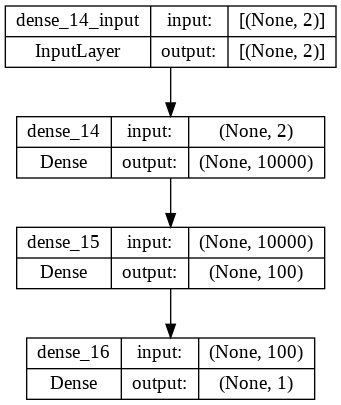

In [66]:
from keras.utils.vis_utils import plot_model
plot_model(NN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

94/94 - 1s - loss: 4.6178e-05 - accuracy: 1.0000 - 775ms/epoch - 8ms/step
Test results - Loss: 4.6177887270459905e-05 - Accuracy: 100.0%
3888/3888 [==============================] - 18s 5ms/step


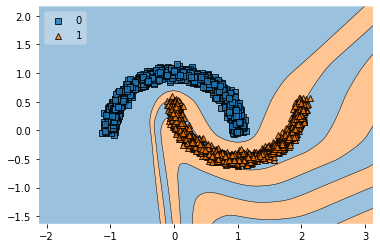

In [70]:
from mlxtend.plotting import plot_decision_regions
# Test the model after training
test_results = NN.evaluate(X_test, y_test, verbose=2)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=NN, legend=2)
plt.show()